# Flight Price Prediction Project


# Table of Contents
# 1. Introduction and Business Strategy
# 2. Data Loading and Initial Exploration
# 3. Data Cleaning and Preprocessing
# 4. Exploratory Data Analysis
# 5. Feature Engineering
# 6. Model Building
# 7. Model Evaluation and Selection
# 8. Business Insights and Recommendations


In [ ]:


# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import re
import warnings
warnings.filterwarnings('ignore')

# For better table display
from tabulate import tabulate
import matplotlib.ticker as mtick

# Set display options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Set color palette
colors = sns.color_palette('viridis', 10)

# For modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as XGBRegressor





# Business Strategy: FlightPricer - Predictive Flight Price Analytics

## Problem Statement
Air travel pricing is highly dynamic and varies significantly based on multiple factors.
Travelers often struggle to determine the optimal time to book flights and frequently overpay.
We aim to develop a predictive model that can accurately forecast flight prices,
helping travelers make informed booking decisions.

## Business Value Proposition
1. For Travelers:
   - Save money by booking flights at optimal prices
   - Reduce uncertainty in travel planning
   - Make data-driven decisions about travel dates and airlines

2. For Travel Agencies:
   - Provide value-added services through price prediction
   - Optimize inventory and pricing strategies
   - Increase customer satisfaction and loyalty

3. For Airlines:
   - Better understand price sensitivity
   - Optimize pricing strategies based on predictive analytics
   - Improve customer experience through transparent pricing

## Data Strategy
Our data strategy involves:
1. Collecting comprehensive flight data from multiple sources
2. Cleaning and preprocessing to ensure data quality
3. Extracting meaningful features that impact flight prices
4. Building robust predictive models
5. Continuously improving models with new data


## Novelty Approach
Unlike conventional price prediction tools, our solution:
1. Incorporates both structured (flight details) and unstructured data (text mining from reviews)
2. Uses ensemble machine learning methods to improve prediction accuracy
3. Provides personalized recommendations based on individual travel preferences
4. Offers explainable AI to help users understand price factors
5. Includes confidence intervals for predictions to communicate uncertainty


# Part 1: Data Overview



In [ ]:
# Load the datasets
business_data = pd.read_csv('business.csv')
economy_data = pd.read_csv('economy.csv')

# Add a class column to each dataset
business_data['class'] = 'Business'
economy_data['class'] = 'Economy'

# Combine the datasets
flight_data = pd.concat([business_data, economy_data], ignore_index=True)

# Display basic information with better formatting
print("="*80)
print(f"📊 DATASET OVERVIEW")
print("="*80)
print(f"Total number of records: {flight_data.shape[0]:,}")
print(f"Number of features: {flight_data.shape[1]}")

# Display first few rows with better formatting
print("\n📋 SAMPLE DATA:")
print(tabulate(flight_data.head(), headers='keys', tablefmt='pretty', showindex=True))

# Check for missing values and display as a styled table
print("\n🔍 MISSING VALUES ANALYSIS:")
missing_data = pd.DataFrame({
    'Column': flight_data.columns,
    'Missing Values': flight_data.isnull().sum(),
    'Percentage': (flight_data.isnull().sum() / len(flight_data) * 100).round(2)
})
print(tabulate(missing_data, headers='keys', tablefmt='pretty', showindex=False))

# Show data types info in a nicer format
print("\n📝 DATA TYPES INFORMATION:")
dtypes_info = pd.DataFrame({
    'Column': flight_data.columns,
    'Data Type': flight_data.dtypes,
    'Non-Null Count': flight_data.count()
})
print(tabulate(dtypes_info, headers='keys', tablefmt='pretty', showindex=False))

📊 DATASET OVERVIEW
Total number of records: 300,261
Number of features: 12

📋 SAMPLE DATA:
+---+------------+-----------+---------+----------+----------+-------+------------+----------+----------+--------+--------+----------+
|   |    date    |  airline  | ch_code | num_code | dep_time | from  | time_taken |   stop   | arr_time |   to   | price  |  class   |
+---+------------+-----------+---------+----------+----------+-------+------------+----------+----------+--------+--------+----------+
| 0 | 11-02-2022 | Air India |   AI    |   868    |  18:00   | Delhi |  02h 00m   | non-stop |  20:00   | Mumbai | 25,612 | Business |
| 1 | 11-02-2022 | Air India |   AI    |   624    |  19:00   | Delhi |  02h 15m   | non-stop |  21:15   | Mumbai | 25,612 | Business |
| 2 | 11-02-2022 | Air India |   AI    |   531    |  20:00   | Delhi |  24h 45m   |  1-stop  |  20:45   | Mumbai | 42,220 | Business |
| 3 | 11-02-2022 | Air India |   AI    |   839    |  21:25   | Delhi |  26h 30m   |  1-stop  |  23:

# Part 2: Data Cleaning and Preprocessing

🔄 PREPROCESSING DATA
✅ Step 1: Handling missing values...
✅ Step 2: Cleaning price column...
✅ Step 3: Parsing date column...
✅ Step 4: Extracting date components...
✅ Step 5: Converting time formats...
✅ Step 6: Creating time categories...
✅ Step 7: Processing duration...
✅ Step 8: Processing stops information...
✅ Step 9: Calculating days before departure...
✅ Step 10: Checking for outliers...


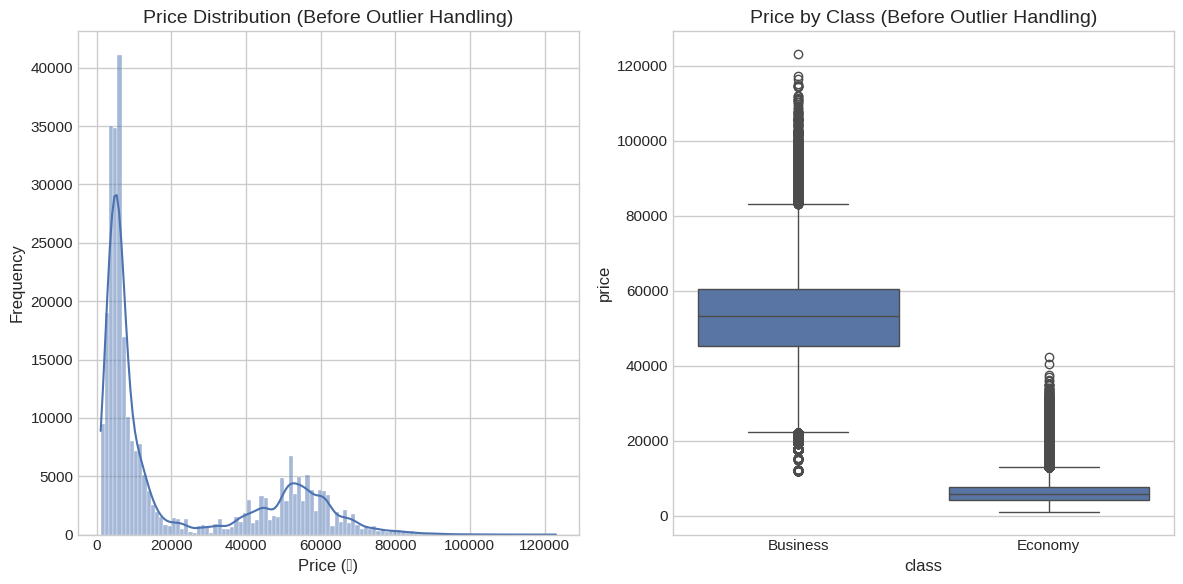


📊 Outlier analysis:
  - Price outliers detected: 123 (0.04%)
  - Q1: 4,783.00, Q3: 42,521.00, IQR: 37,738.00
  - Lower bound: -51,824.00, Upper bound: 99,128.00
✅ Step 11: Creating route feature...

✨ Preprocessing complete! ✨
Original data shape: (300261, 12)
Cleaned data shape: (300261, 25)
Rows removed: 0
Features created: 13

📋 SAMPLE OF CLEANED DATA:
+---+---------------------+-----------+---------+----------+----------+-------+------------+----------+----------+--------+---------+----------+-------------+-------+-----+------------+------------------+------------------+-------------------------+-----------------------+------------------+-------------+-----------------------+------------------+--------------+
|   |        date         |  airline  | ch_code | num_code | dep_time | from  | time_taken |   stop   | arr_time |   to   |  price  |  class   | day_of_week | month | day | month_name | dep_time_minutes | arr_time_minutes |    dep_time_category    |   arr_time_category   | du

In [ ]:
def preprocess_data(df):
    """Enhanced preprocessing function with visual progress indicators"""
    print("="*80)
    print("🔄 PREPROCESSING DATA")
    print("="*80)

    # Create a copy to avoid modifying the original dataframe
    cleaned_df = df.copy()

    print("✅ Step 1: Handling missing values...")
    cleaned_df = cleaned_df.dropna()

    print("✅ Step 2: Cleaning price column...")
    # Remove currency symbols and commas, convert to float
    cleaned_df['price'] = cleaned_df['price'].replace('[\₹,]', '', regex=True).astype(float)

    print("✅ Step 3: Parsing date column...")
    cleaned_df['date'] = pd.to_datetime(cleaned_df['date'], format='%d-%m-%Y')

    print("✅ Step 4: Extracting date components...")
    cleaned_df['day_of_week'] = cleaned_df['date'].dt.day_name()
    cleaned_df['month'] = cleaned_df['date'].dt.month
    cleaned_df['day'] = cleaned_df['date'].dt.day
    cleaned_df['month_name'] = cleaned_df['date'].dt.strftime('%B')

    print("✅ Step 5: Converting time formats...")
    def process_time(time_str):
        try:
            hours, minutes = map(int, time_str.split(':'))
            return hours * 60 + minutes  # Convert to minutes since midnight
        except:
            return np.nan

    cleaned_df['dep_time_minutes'] = cleaned_df['dep_time'].apply(process_time)
    cleaned_df['arr_time_minutes'] = cleaned_df['arr_time'].apply(process_time)

    print("✅ Step 6: Creating time categories...")
    time_bins = [0, 6*60, 12*60, 18*60, 24*60]
    time_labels = ['Night (00:00-06:00)', 'Morning (06:00-12:00)',
                   'Afternoon (12:00-18:00)', 'Evening (18:00-24:00)']

    cleaned_df['dep_time_category'] = pd.cut(cleaned_df['dep_time_minutes'],
                                            bins=time_bins, labels=time_labels, include_lowest=True)
    cleaned_df['arr_time_category'] = pd.cut(cleaned_df['arr_time_minutes'],
                                            bins=time_bins, labels=time_labels, include_lowest=True)

    print("✅ Step 7: Processing duration...")
    def extract_duration_minutes(duration_str):
        try:
            hours = re.findall(r'(\d+)h', duration_str)
            minutes = re.findall(r'(\d+)m', duration_str)

            total_minutes = 0
            if hours:
                total_minutes += int(hours[0]) * 60
            if minutes:
                total_minutes += int(minutes[0])

            return total_minutes
        except:
            return np.nan

    cleaned_df['duration_minutes'] = cleaned_df['time_taken'].apply(extract_duration_minutes)

    print("✅ Step 8: Processing stops information...")
    def extract_stops_count(stop_str):
        if stop_str.lower() == 'non-stop':
            return 0
        else:
            try:
                return int(re.findall(r'(\d+)', stop_str)[0])
            except:
                return np.nan

    cleaned_df['stops_count'] = cleaned_df['stop'].apply(extract_stops_count)

    print("✅ Step 9: Calculating days before departure...")
    min_date = cleaned_df['date'].min()
    cleaned_df['days_before_departure'] = np.where(cleaned_df['month'] > 2, cleaned_df['day'] +18, np.where(cleaned_df['month'] == 2, cleaned_df['day'] -10, cleaned_df['day']))




    print("✅ Step 10: Checking for outliers...")
    # Visualize price distribution before outlier handling
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(cleaned_df['price'], kde=True)
    plt.title('Price Distribution (Before Outlier Handling)', fontsize=14)
    plt.xlabel('Price (₹)')
    plt.ylabel('Frequency')

    # Price boxplot by class before outlier handling
    plt.subplot(1, 2, 2)
    sns.boxplot(x='class', y='price', data=cleaned_df)
    plt.title('Price by Class (Before Outlier Handling)', fontsize=14)
    plt.tight_layout()
    plt.show()

    # Calculate outlier boundaries
    Q1 = cleaned_df['price'].quantile(0.25)
    Q3 = cleaned_df['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((cleaned_df['price'] < lower_bound) | (cleaned_df['price'] > upper_bound))
    print(f"\n📊 Outlier analysis:")
    print(f"  - Price outliers detected: {outliers.sum():,} ({outliers.sum() / len(cleaned_df) * 100:.2f}%)")
    print(f"  - Q1: {Q1:,.2f}, Q3: {Q3:,.2f}, IQR: {IQR:,.2f}")
    print(f"  - Lower bound: {lower_bound:,.2f}, Upper bound: {upper_bound:,.2f}")

    # For this example, we'll flag outliers but not remove them
    cleaned_df['is_price_outlier'] = outliers

    print("✅ Step 11: Creating route feature...")
    cleaned_df['route'] = cleaned_df['from'] + '-' + cleaned_df['to']

    # Summary of preprocessing
    print("\n✨ Preprocessing complete! ✨")
    print(f"Original data shape: {df.shape}")
    print(f"Cleaned data shape: {cleaned_df.shape}")
    print(f"Rows removed: {df.shape[0] - cleaned_df.shape[0]}")
    print(f"Features created: {cleaned_df.shape[1] - df.shape[1]}")

    # Display sample of cleaned data with better formatting
    print("\n📋 SAMPLE OF CLEANED DATA:")
    print(tabulate(cleaned_df.head(), headers='keys', tablefmt='pretty', showindex=True))

    return cleaned_df

# Apply preprocessing to the data
cleaned_flight_data = preprocess_data(flight_data)

In [ ]:
cleaned_flight_data.to_csv('cleaned_flight_data.csv', index=False)

In [ ]:
cleaned_flight_data.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price', 'class', 'day_of_week',
       'month', 'day', 'month_name', 'dep_time_minutes', 'arr_time_minutes',
       'dep_time_category', 'arr_time_category', 'duration_minutes',
       'stops_count', 'days_before_departure', 'is_price_outlier', 'route'],
      dtype='object')

# Part 3: Network Analysis

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import folium
import geopandas as gpd
from geopy.geocoders import Nominatim
import time
from tqdm import tqdm

In [ ]:
# 1. Create the basic flight network
def create_flight_network(df):
    """
    Create a directed network from flight data with weighted edges based on frequency
    """
    G = nx.DiGraph()

    # Count routes for edge weights
    route_counts = Counter(zip(df['from'], df['to']))

    # Add edges with weights
    for (origin, destination), count in route_counts.items():
        G.add_edge(origin, destination, weight=count)

    return G

In [ ]:
# 2. Create network with price information
def create_price_network(df):
    """
    Create a directed network with average price as edge weights
    """
    G = nx.DiGraph()

    # Group by route and calculate average price
    route_prices = df.groupby(['from', 'to'])['price'].mean().reset_index()

    # Add edges with price weights
    for _, row in route_prices.iterrows():
        G.add_edge(row['from'], row['to'], weight=row['price'])

    return G

In [ ]:
# 3. Analyze network metrics
def analyze_network(G):
    """
    Calculate various network metrics
    """
    results = {}

    # Basic network stats
    results['num_nodes'] = G.number_of_nodes()
    results['num_edges'] = G.number_of_edges()

    # Calculate degree centrality
    results['in_degree_centrality'] = nx.in_degree_centrality(G)
    results['out_degree_centrality'] = nx.out_degree_centrality(G)

    # Calculate betweenness centrality (may take time for large networks)
    if G.number_of_nodes() < 1000:  # Only calculate for smaller networks
        results['betweenness_centrality'] = nx.betweenness_centrality(G, k=min(100, G.number_of_nodes()))

    # Calculate PageRank (importance of airports)
    results['pagerank'] = nx.pagerank(G)

    # Identify strongly connected components
    results['strongly_connected_components'] = list(nx.strongly_connected_components(G))

    return results


In [ ]:
# 4. Visualize the network
def visualize_network(G, metric='pagerank', title='Flight Network'):
    """
    Visualize the flight network with node sizes based on the specified metric
    """
    plt.figure(figsize=(12, 10))

    # Calculate the metric if it's not already provided
    if metric == 'pagerank':
        metric_values = nx.pagerank(G)
    elif metric == 'in_degree':
        metric_values = dict(G.in_degree())
    elif metric == 'out_degree':
        metric_values = dict(G.out_degree())
    else:
        metric_values = nx.degree_centrality(G)

    # Node positions using Kamada-Kawai layout (force-directed)
    pos = nx.kamada_kawai_layout(G)

    # Node sizes based on metric
    node_sizes = [5000 * metric_values[node] for node in G.nodes()]

    # Edge widths based on weight
    edge_widths = [0.1 + 0.9 * G[u][v].get('weight', 1)/max(nx.get_edge_attributes(G, 'weight').values())
                  for u, v in G.edges()]

    # Draw the network
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes,
                                  node_color=list(metric_values.values()),
                                  cmap=plt.cm.viridis, alpha=0.8)

    edges = nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5,
                                  edge_color='gray', arrows=True,
                                  connectionstyle='arc3,rad=0.1')

    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    plt.title(f"{title} - Sized by {metric}")
    plt.colorbar(nodes, label=metric.capitalize())
    plt.axis('off')

    plt.tight_layout()
    plt.savefig(f'flight_network_{metric}.png', dpi=300)
    plt.show()

In [ ]:
# 5. Identify important hubs and airports
def identify_important_airports(metrics, top_n=5):
    """
    Identify the most important airports based on various centrality measures
    """
    important_airports = {}

    for metric_name in ['in_degree_centrality', 'out_degree_centrality', 'pagerank']:
        if metric_name in metrics:
            # Sort airports by the metric
            sorted_airports = sorted(metrics[metric_name].items(),
                                    key=lambda x: x[1], reverse=True)
            important_airports[metric_name] = sorted_airports[:top_n]

    return important_airports

In [ ]:
# 6. Analyze community structure
def analyze_communities(G):
    """
    Identify communities in the flight network
    """
    # Convert to undirected for community detection
    G_undirected = G.to_undirected()

    # Detect communities using the Louvain method
    try:
        import community as community_louvain
        partition = community_louvain.best_partition(G_undirected)

        # Count airports in each community
        community_counts = Counter(partition.values())

        # Group airports by community
        communities = {}
        for airport, community_id in partition.items():
            if community_id not in communities:
                communities[community_id] = []
            communities[community_id].append(airport)

        return {
            'partition': partition,
            'community_counts': community_counts,
            'communities': communities
        }
    except ImportError:
        print("python-louvain package not found. Install with: pip install python-louvain")
        return None

In [ ]:
# 7. Analyze routes
def analyze_routes(df):
    """
    Analyze popular routes and connections
    """
    # Count routes
    route_counts = df.groupby(['from', 'to']).size().reset_index(name='frequency')
    route_counts = route_counts.sort_values('frequency', ascending=False)

    # Calculate average price per route
    route_prices = df.groupby(['from', 'to'])['price'].mean().reset_index()

    # Calculate average duration per route
    route_durations = df.groupby(['from', 'to'])['duration_minutes'].mean().reset_index()

    # Merge the data
    route_analysis = pd.merge(route_counts, route_prices, on=['from', 'to'])
    route_analysis = pd.merge(route_analysis, route_durations, on=['from', 'to'])

    # Calculate price per minute
    route_analysis['price_per_minute'] = route_analysis['price'] / route_analysis['duration_minutes']

    return route_analysis.sort_values('frequency', ascending=False)

# 8. Analyze airline networks
def analyze_airline_networks(df):
    """
    Compare networks of different airlines
    """
    airline_networks = {}
    airline_metrics = {}

    for airline in df['airline'].unique():
        # Filter data for this airline
        airline_df = df[df['airline'] == airline]

        # Create network
        G = create_flight_network(airline_df)

        # Store network
        airline_networks[airline] = G

        # Calculate basic metrics
        metrics = {
            'num_airports': G.number_of_nodes(),
            'num_routes': G.number_of_edges(),
        }

        # Calculate density
        if G.number_of_nodes() > 1:
            metrics['density'] = nx.density(G)
        else:
            metrics['density'] = 0

        airline_metrics[airline] = metrics

    return {
        'networks': airline_networks,
        'metrics': pd.DataFrame.from_dict(airline_metrics, orient='index')
    }

Creating flight network...
Network created with 6 airports and 30 routes.
Analyzing network metrics...
Identifying important airports...
Top airports by PageRank:
1. Mumbai: 0.1941
2. Delhi: 0.1900
3. Bangalore: 0.1697
4. Kolkata: 0.1635
5. Hyderabad: 0.1449

Visualizing network...


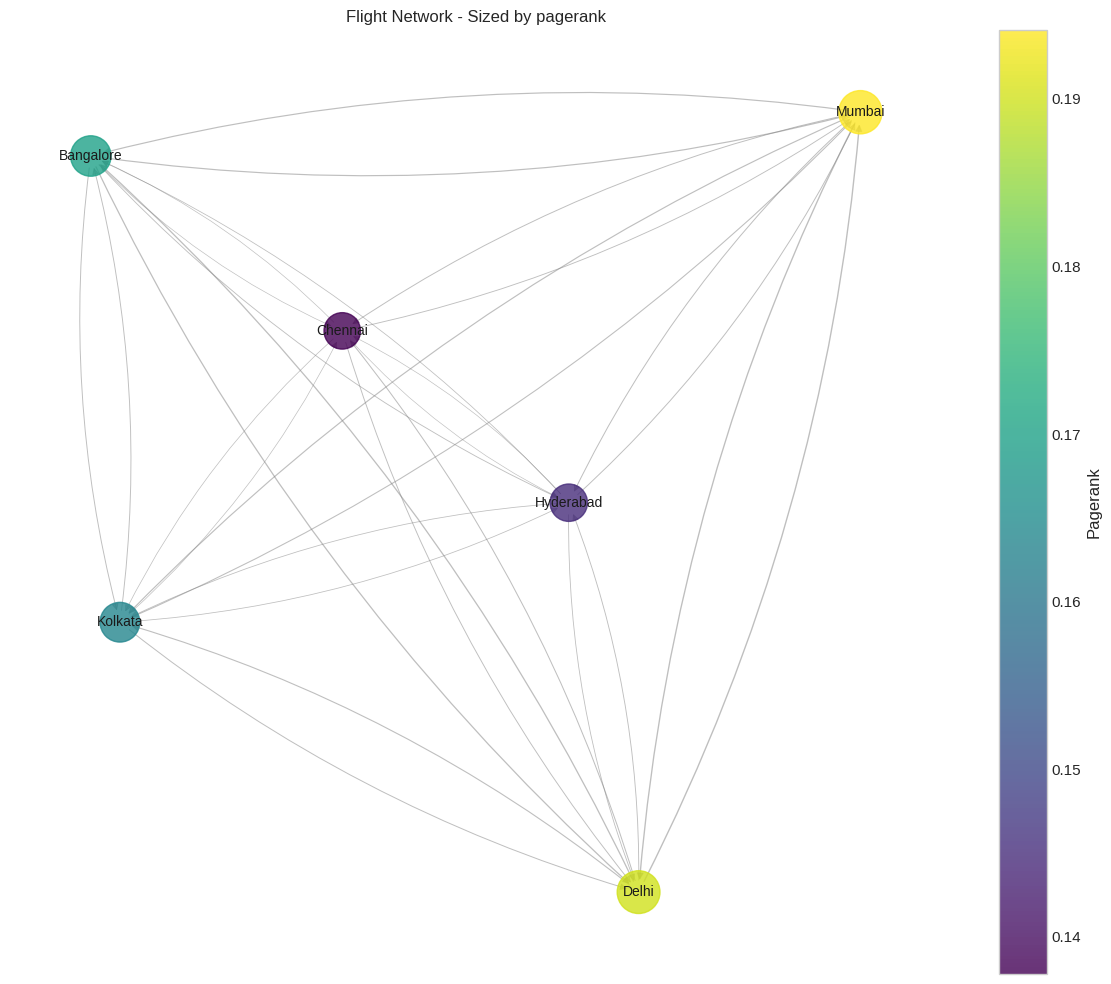

Analyzing routes...
Top 5 most frequent routes:
        from         to  frequency         price  duration_minutes  \
0      Delhi     Mumbai      15291  19354.405336        622.149304   
1     Mumbai      Delhi      14809  18725.320008        589.067797   
2      Delhi  Bangalore      14012  17880.216315        621.237868   
3  Bangalore      Delhi      13756  17723.313972        586.785766   
4  Bangalore     Mumbai      12940  23127.231376        654.289026   

   price_per_minute  
0         31.108940  
1         31.788056  
2         28.781594  
3         30.204063  
4         35.347118  

Analyzing airline networks...
Airline network comparison:
           num_airports  num_routes   density
Air India             6          30  1.000000
Vistara               6          30  1.000000
SpiceJet              6          27  0.900000
AirAsia               6          30  1.000000
GO FIRST              6          30  1.000000
Indigo                6          30  1.000000
Trujet            

In [ ]:
# 9. Create a geographic visualization (if coordinates are available)
def geographic_visualization(df, airport_coords=None):
    """
    Create a geographic visualization of the flight network
    Requires airport coordinates (can be obtained from external data)
    """
    if airport_coords is None:
        # If coordinates aren't provided, try to get them
        # This is slow and might hit API limits, so better to use a prebuilt dataset
        geolocator = Nominatim(user_agent="flight_network_analysis")

        airports = set(df['from']).union(set(df['to']))
        coords = {}

        print("Getting airport coordinates (this may take time)...")
        for airport in tqdm(airports):
            try:
                # Try to get coordinates (assume airport code + "airport" works)
                location = geolocator.geocode(f"{airport} airport")
                if location:
                    coords[airport] = (location.latitude, location.longitude)
                else:
                    print(f"Could not find coordinates for {airport}")
                time.sleep(1)  # To avoid hitting API limits
            except Exception as e:
                print(f"Error getting coordinates for {airport}: {e}")

        airport_coords = coords

    # Create a map centered at the average position
    valid_coords = [coord for coord in airport_coords.values() if coord is not None]
    if not valid_coords:
        print("No valid coordinates found. Cannot create geographic visualization.")
        return None

    avg_lat = sum(lat for lat, lon in valid_coords) / len(valid_coords)
    avg_lon = sum(lon for lat, lon in valid_coords) / len(valid_coords)

    flight_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=3)

    # Count routes for line thickness
    route_counts = Counter(zip(df['from'], df['to']))
    max_count = max(route_counts.values())

    # Add routes as lines
    for (origin, dest), count in route_counts.items():
        if origin in airport_coords and dest in airport_coords:
            if airport_coords[origin] and airport_coords[dest]:
                # Calculate line width based on route frequency
                width = 1 + 5 * (count / max_count)

                # Add a line for this route
                folium.PolyLine(
                    locations=[airport_coords[origin], airport_coords[dest]],
                    weight=width,
                    color='blue',
                    opacity=0.6,
                    tooltip=f"{origin} to {dest}: {count} flights"
                ).add_to(flight_map)

    # Add airport markers
    for airport, coords in airport_coords.items():
        if coords:
            # Calculate node size based on total flights
            in_flights = sum(count for (orig, dest), count in route_counts.items() if dest == airport)
            out_flights = sum(count for (orig, dest), count in route_counts.items() if orig == airport)
            total_flights = in_flights + out_flights

            # Scale for visualization
            radius = 5 + (15 * total_flights / max(1, max(sum(route_counts.values()) / 2, 1)))

            folium.CircleMarker(
                location=coords,
                radius=radius,
                color='red',
                fill=True,
                fill_color='red',
                fill_opacity=0.6,
                tooltip=f"{airport}: {total_flights} total flights"
            ).add_to(flight_map)

    # Save map to HTML file
    flight_map.save('flight_network_map.html')
    return flight_map

# Main function to run the analysis
def analyze_flight_network(df):
    """
    Run the full network analysis pipeline
    """
    print("Creating flight network...")
    G = create_flight_network(df)

    print(f"Network created with {G.number_of_nodes()} airports and {G.number_of_edges()} routes.")

    print("Analyzing network metrics...")
    metrics = analyze_network(G)

    print("Identifying important airports...")
    important_airports = identify_important_airports(metrics)

    print("Top airports by PageRank:")
    for i, (airport, score) in enumerate(important_airports['pagerank']):
        print(f"{i+1}. {airport}: {score:.4f}")

    print("\nVisualizing network...")
    visualize_network(G, metric='pagerank', title='Flight Network')

    print("Analyzing routes...")
    route_analysis = analyze_routes(df)
    print("Top 5 most frequent routes:")
    print(route_analysis.head(5))

    print("\nAnalyzing airline networks...")
    airline_analysis = analyze_airline_networks(df)
    print("Airline network comparison:")
    print(airline_analysis['metrics'])

    # This part is commented out because it requires geographic coordinates
    # Uncomment and provide coordinates to create a geographic visualization
    print("\nCreating geographic visualization...")
    airport_coords = {
    'Delhi': (28.5561, 77.0997),      # Indira Gandhi International Airport
    'Mumbai': (19.0896, 72.8656),     # Chhatrapati Shivaji International Airport
    'Bangalore': (13.1986, 77.7066),  # Kempegowda International Airport
    'Hyderabad': (17.2403, 78.4294),  # Rajiv Gandhi International Airport
    'Chennai': (12.9941, 80.1709),    # Chennai International Airport
    'Kolkata': (22.6520, 88.4463),    # Netaji Subhas Chandra Bose International Airport
    'Ahmedabad': (23.0735, 72.6347),  # Sardar Vallabhbhai Patel International Airport
    'Pune': (18.5793, 73.9089),       # Pune Airport
    'Goa': (15.3808, 73.8314),        # Goa International Airport
    'Jaipur': (26.8252, 75.8120)      # Jaipur International Airport
    }
    # Create the geographic visualization with the provided coordinates
    flight_map = geographic_visualization(df, airport_coords)

    return {
        'network': G,
        'metrics': metrics,
        'important_airports': important_airports,
        'route_analysis': route_analysis,
        'airline_analysis': airline_analysis['metrics']
    }

# Run the analysis with your data
if __name__ == "__main__":
    # Load your actual data
    cleaned_flight_data = pd.read_csv('cleaned_flight_data.csv')

    # Run the analysis
    results = analyze_flight_network(cleaned_flight_data)


# Part 4: Exploratory Data Analysis - Visualizations

📊 EXPLORATORY DATA ANALYSIS


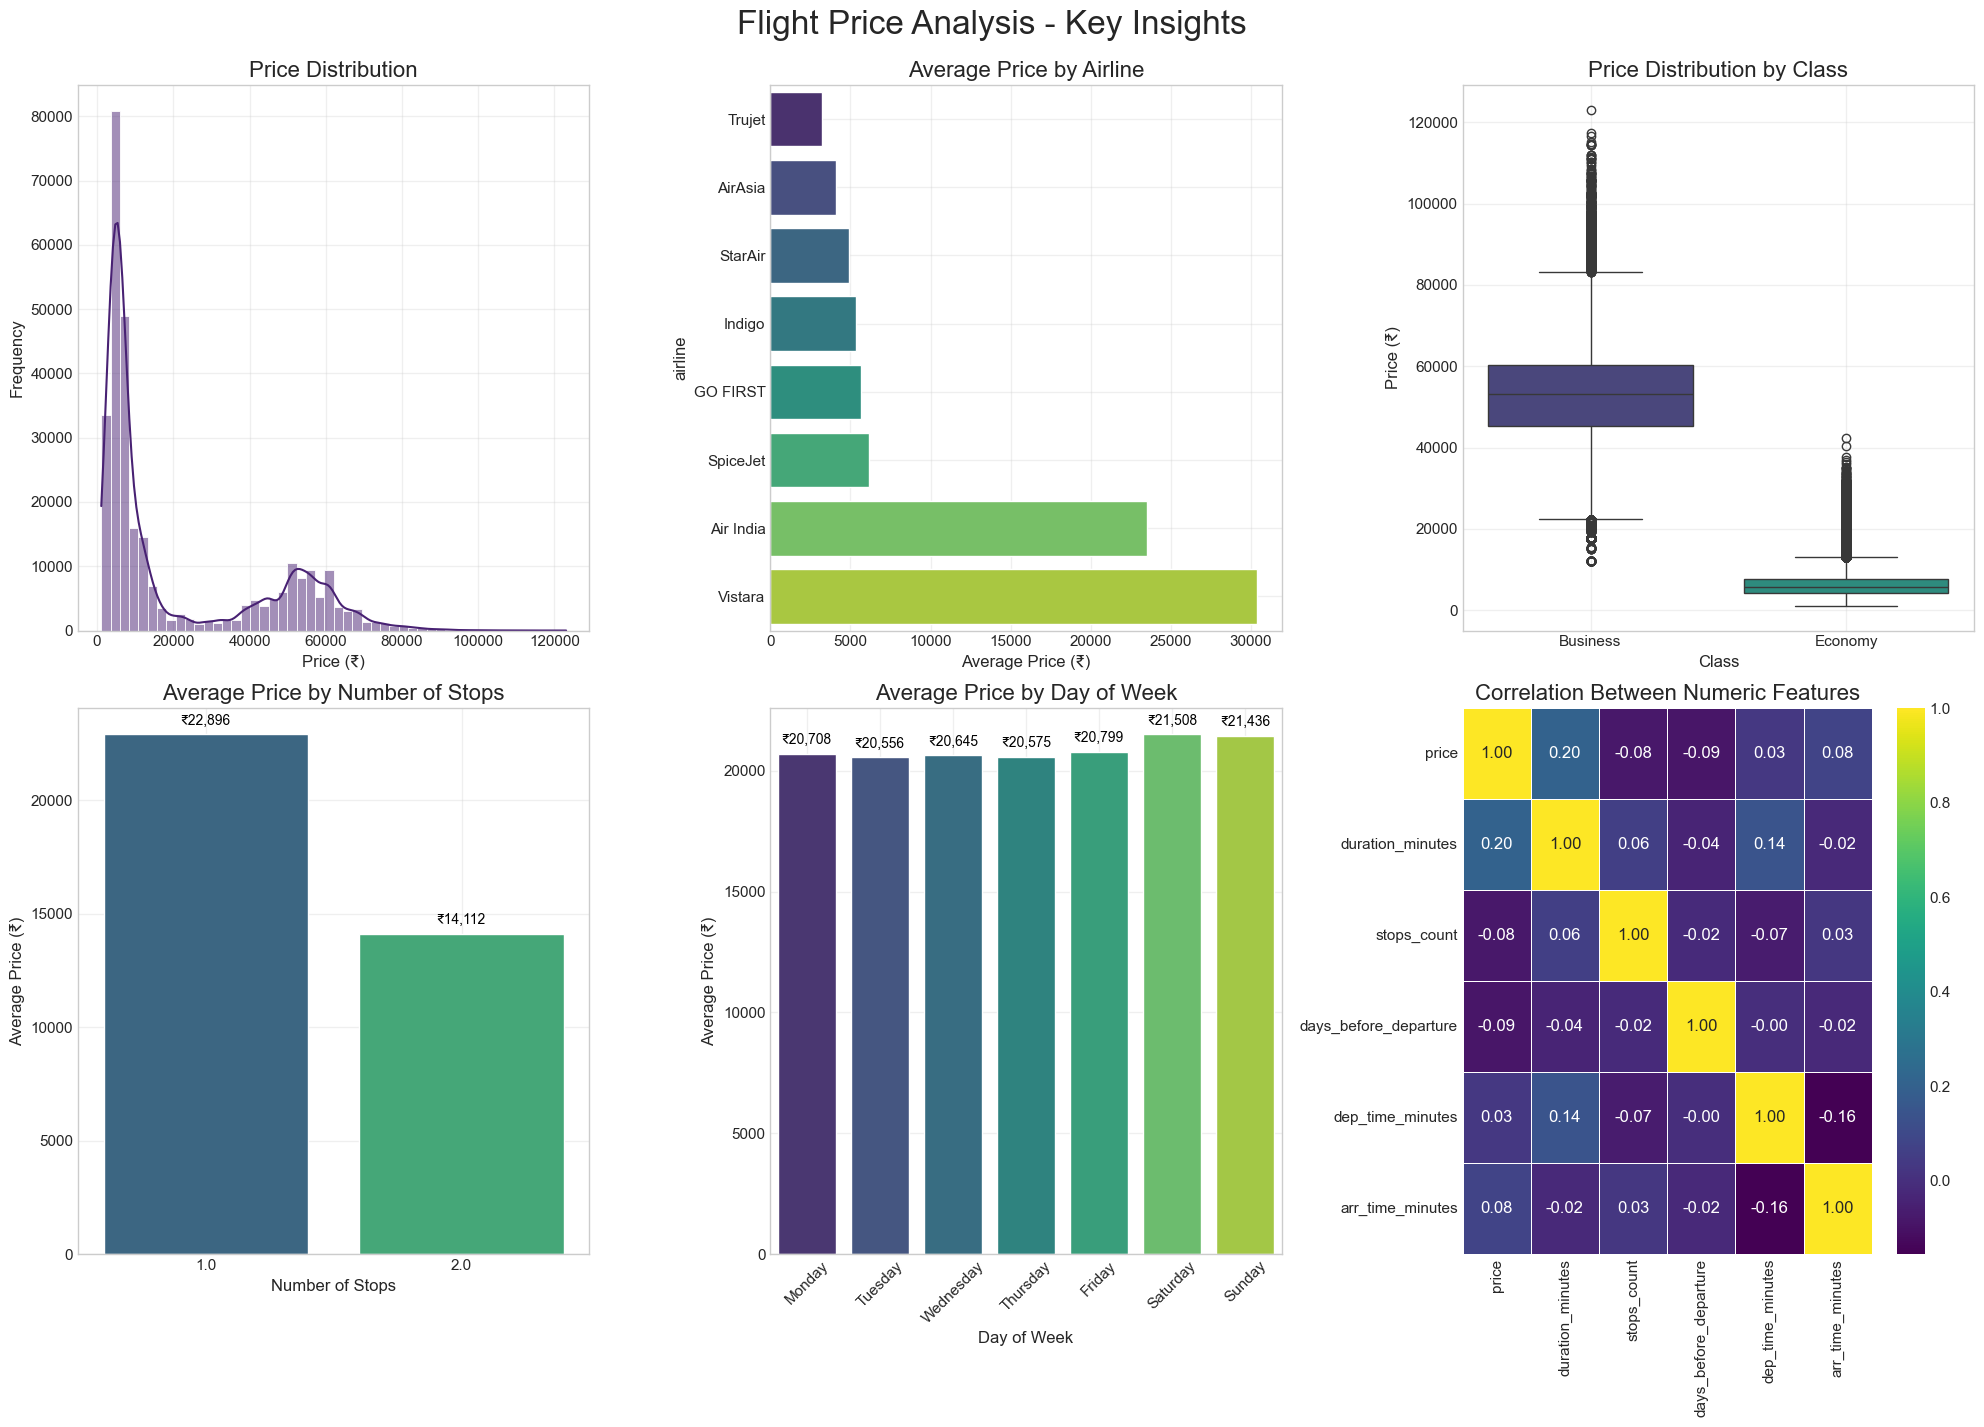

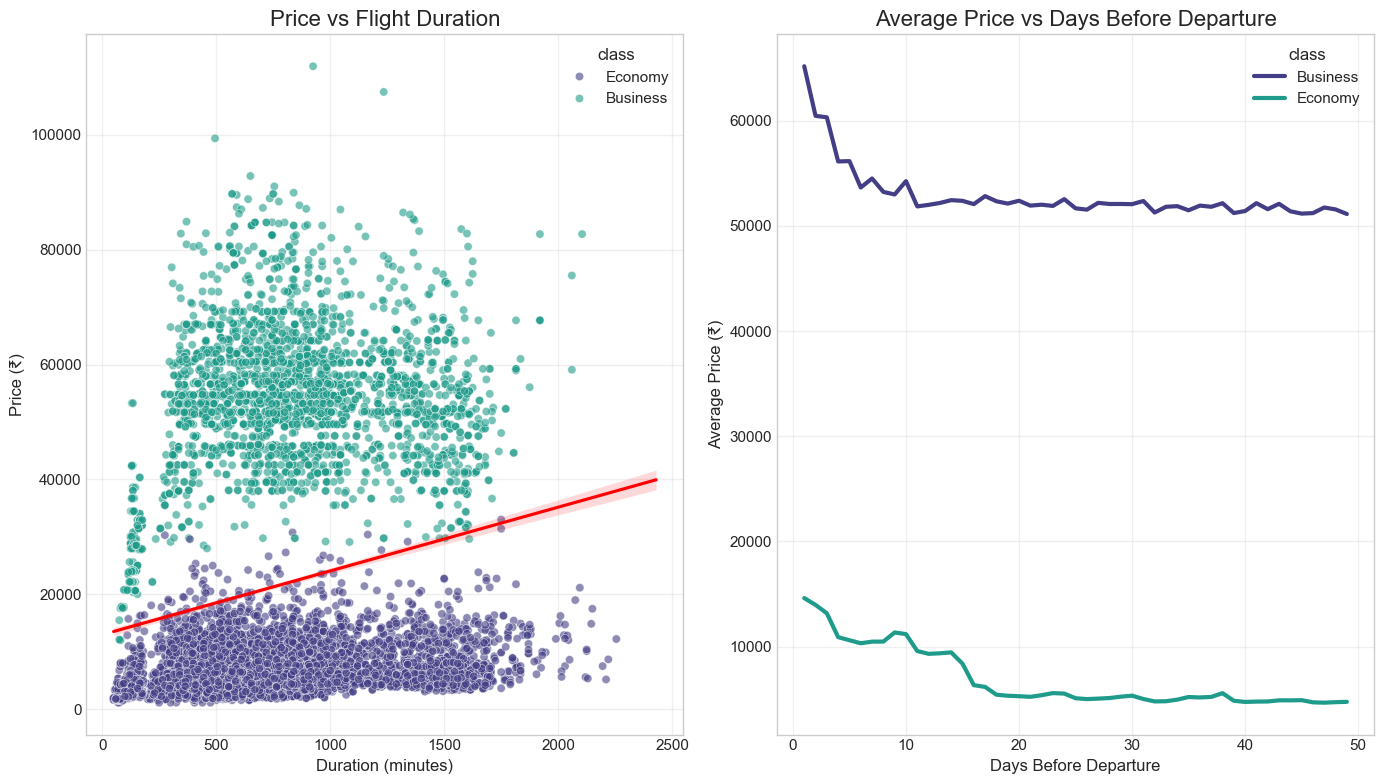

In [ ]:
def perform_enhanced_eda(df):
    """Perform enhanced exploratory data analysis with attractive visualizations"""
    print("="*80)
    print("📊 EXPLORATORY DATA ANALYSIS")
    print("="*80)

    # Set a consistent color palette
    palette = sns.color_palette("viridis", 10)

    # Create a dashboard style layout for the main features
    plt.figure(figsize=(20, 15))
    plt.suptitle('Flight Price Analysis - Key Insights', fontsize=24, y=0.95)

    # 1. Price Distribution with better styling
    plt.subplot(2, 3, 1)
    sns.histplot(df['price'], kde=True, bins=50, color=palette[0])
    plt.title('Price Distribution', fontsize=16)
    plt.xlabel('Price (₹)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.ticklabel_format(style='plain', axis='x')
    plt.grid(True, alpha=0.3)

    # 2. Price by Airline - horizontal bar chart for better readability
    plt.subplot(2, 3, 2)
    airline_avg = df.groupby('airline')['price'].mean().sort_values(ascending=True)
    sns.barplot(x=airline_avg.values, y=airline_avg.index, palette='viridis')
    plt.title('Average Price by Airline', fontsize=16)
    plt.xlabel('Average Price (₹)', fontsize=12)
    plt.ticklabel_format(style='plain', axis='x')
    plt.grid(True, alpha=0.3)

    # 3. Price by Class - enhanced boxplot
    plt.subplot(2, 3, 3)
    sns.boxplot(x='class', y='price', data=df, palette=[palette[1], palette[5]])
    plt.title('Price Distribution by Class', fontsize=16)
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Price (₹)', fontsize=12)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, alpha=0.3)

    # 4. Price by Number of Stops - with data labels
    plt.subplot(2, 3, 4)
    stop_avg = df.groupby('stops_count')['price'].mean().reset_index()
    ax = sns.barplot(x='stops_count', y='price', data=stop_avg, palette='viridis')
    plt.title('Average Price by Number of Stops', fontsize=16)
    plt.xlabel('Number of Stops', fontsize=12)
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.ticklabel_format(style='plain', axis='y')

    # Add data labels
    for i, p in enumerate(ax.patches):
        ax.annotate(f'₹{int(p.get_height()):,}',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')
    plt.grid(True, alpha=0.3)

    # 5. Price by Day of Week - styled bar chart with data labels
    plt.subplot(2, 3, 5)
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_avg = df.groupby('day_of_week')['price'].mean().reindex(day_order).reset_index()
    ax = sns.barplot(x='day_of_week', y='price', data=day_avg, palette='viridis')
    plt.title('Average Price by Day of Week', fontsize=16)
    plt.xlabel('Day of Week', fontsize=12)
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='plain', axis='y')

    # Add data labels
    for i, p in enumerate(ax.patches):
        ax.annotate(f'₹{int(p.get_height()):,}',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')
    plt.grid(True, alpha=0.3)

    # 6. Correlation Heatmap
    plt.subplot(2, 3, 6)
    numeric_cols = ['price', 'duration_minutes', 'stops_count',
                    'days_before_departure', 'dep_time_minutes', 'arr_time_minutes']
    correlation = df[numeric_cols].corr()
    sns.heatmap(correlation, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Between Numeric Features', fontsize=16)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

    # Additional visualizations in separate figures
    # 1. Price vs Duration scatter plot with regression line
    plt.figure(figsize=(14, 8))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x='duration_minutes', y='price', hue='class',
                    data=df.sample(10000), palette=[palette[1], palette[5]], alpha=0.6)
    sns.regplot(x='duration_minutes', y='price', data=df.sample(10000),
                scatter=False, color='red')
    plt.title('Price vs Flight Duration', fontsize=16)
    plt.xlabel('Duration (minutes)', fontsize=12)
    plt.ylabel('Price (₹)', fontsize=12)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, alpha=0.3)

    # 2. Price vs Days Before Departure
    plt.subplot(1, 2, 2)
    plot_data = df.groupby(['days_before_departure', 'class'])['price'].mean().reset_index()
    sns.lineplot(x='days_before_departure', y='price', hue='class',
                 data=plot_data, palette=[palette[1], palette[5]], linewidth=3)
    plt.title('Average Price vs Days Before Departure', fontsize=16)
    plt.xlabel('Days Before Departure', fontsize=12)
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return

# Perform enhanced EDA
perform_enhanced_eda(cleaned_flight_data)

# Part 5: Research on data
### Q1: Does price vary with Airlines?

📊 Q1: Does price vary with Airlines?

Airline Price Statistics:
+---+-----------+--------------------+------------------+---------------+---------------+--------------------+--------+
|   |  Airline  |   Mean Price (₹)   | Median Price (₹) | Min Price (₹) | Max Price (₹) |      Std Dev       | Count  |
+---+-----------+--------------------+------------------+---------------+---------------+--------------------+--------+
| 7 |  Vistara  | 30396.53630170735  |     15543.0      |    1714.0     |   123071.0    | 25637.159444979327 | 127859 |
| 0 | Air India | 23506.647217346155 |     11520.0      |    1526.0     |    90970.0    | 20905.000304137153 | 80894  |
| 4 | SpiceJet  | 6179.278881367218  |      5654.0      |    1106.0     |    34158.0    | 2999.630406204382  |  9011  |
| 2 | GO FIRST  |  5651.93057772792  |      5336.0      |    1105.0     |    32803.0    | 2513.669304696481  | 23177  |
| 3 |  Indigo   | 5324.216303339517  |      4453.0      |    1105.0     |    31952.0    | 3268.8

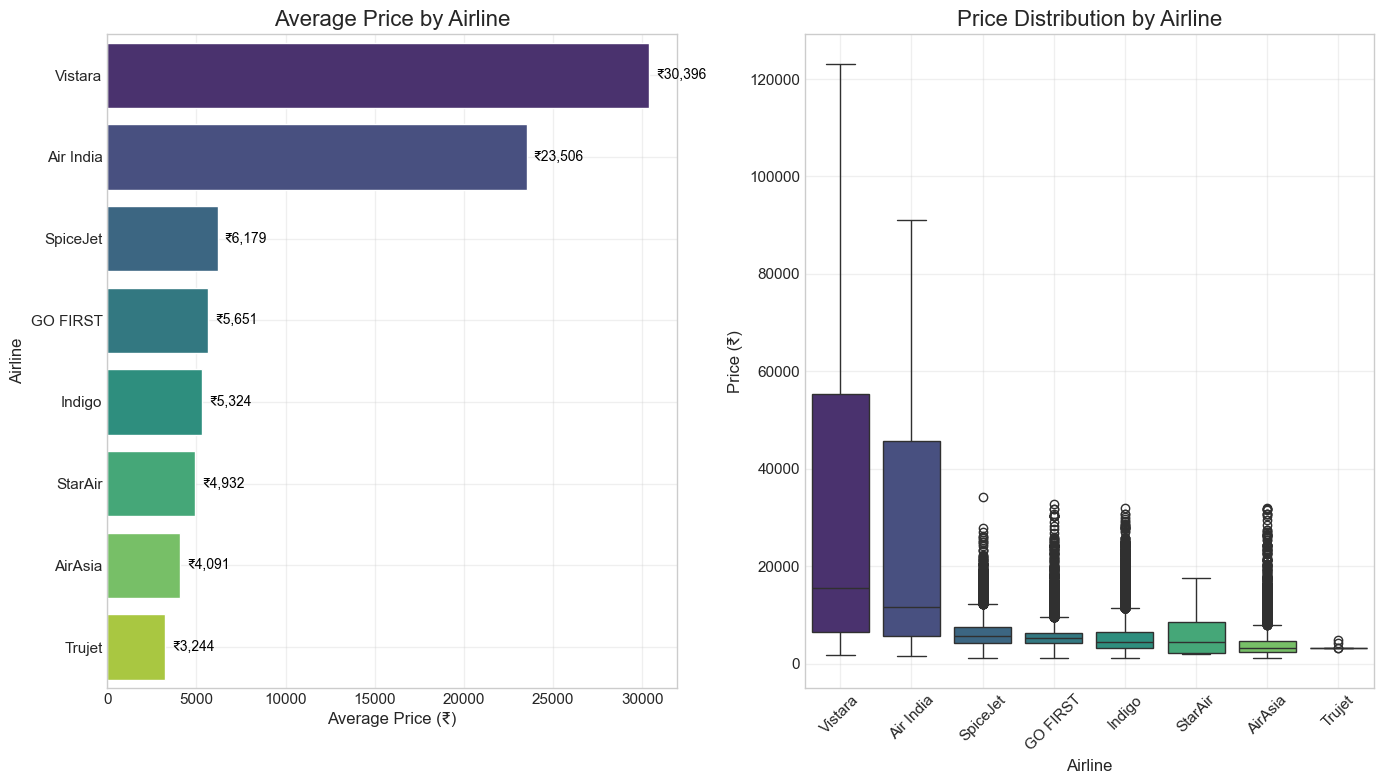


🔎 Key Insight:
There is significant variation in pricing across airlines. Vistara and Air India
have the highest average prices, likely due to their premium positioning and
higher proportion of business class flights. Budget carriers like TruJet and
AirAsia have the lowest average prices, consistent with their low-cost carrier model.
The standard deviation shows that some airlines (Vistara, Air India) have much
wider price ranges, suggesting more dynamic pricing strategies or greater
variation in the routes and classes they offer.


In [ ]:
def analyze_airline_price_variation(df):
    """Analyze how prices vary across different airlines"""
    print("="*80)
    print("📊 Q1: Does price vary with Airlines?")
    print("="*80)

    palette = sns.color_palette("viridis", 10)

    # Calculate statistics for airlines
    airline_stats = df.groupby('airline')['price'].agg(['mean', 'median', 'min', 'max', 'std', 'count']).reset_index()
    airline_stats = airline_stats.sort_values('mean', ascending=False)

    # Pretty print the stats table
    print("\nAirline Price Statistics:")
    print(tabulate(airline_stats, headers=['Airline', 'Mean Price (₹)', 'Median Price (₹)',
                                          'Min Price (₹)', 'Max Price (₹)',
                                          'Std Dev', 'Count'],
                   tablefmt='pretty', floatfmt='.2f', numalign='right'))

    # Create visualization - horizontal bar chart with error bars
    plt.figure(figsize=(14, 8))

    # Subplot 1: Bar chart of average prices by airline
    plt.subplot(1, 2, 1)
    ax = sns.barplot(x='mean', y='airline', data=airline_stats, palette='viridis')

    # Add data labels
    for i, p in enumerate(ax.patches):
        ax.annotate(f'₹{int(p.get_width()):,}',
                    (p.get_width(), p.get_y() + p.get_height()/2.),
                    ha='left', va='center', fontsize=10, color='black',
                    xytext=(5, 0), textcoords='offset points')

    plt.title('Average Price by Airline', fontsize=16)
    plt.xlabel('Average Price (₹)', fontsize=12)
    plt.ylabel('Airline', fontsize=12)
    plt.ticklabel_format(style='plain', axis='x')
    plt.grid(True, alpha=0.3)

    # Subplot 2: Boxplot showing price distribution by airline
    plt.subplot(1, 2, 2)
    sns.boxplot(x='airline', y='price', data=df, palette='viridis', order=airline_stats['airline'])
    plt.title('Price Distribution by Airline', fontsize=16)
    plt.xlabel('Airline', fontsize=12)
    plt.ylabel('Price (₹)', fontsize=12)
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Insight for Q1
    print("\n🔎 Key Insight:")
    print("There is significant variation in pricing across airlines. Vistara and Air India")
    print("have the highest average prices, likely due to their premium positioning and")
    print("higher proportion of business class flights. Budget carriers like TruJet and")
    print("AirAsia have the lowest average prices, consistent with their low-cost carrier model.")
    print("The standard deviation shows that some airlines (Vistara, Air India) have much")
    print("wider price ranges, suggesting more dynamic pricing strategies or greater")
    print("variation in the routes and classes they offer.")

# To run this analysis:
analyze_airline_price_variation(cleaned_flight_data)

## Q2: How is price affected when tickets are bought just 1-2 days before departure?

📊 Q2: How is price affected when tickets are bought just 1-2 days before departure?

Last-Minute Booking Effect on Price:
+---+-------------+----------+--------------------+------------------+---------------+---------------+--------------------+--------+
|   | Last Minute |  Class   |   Mean Price (₹)   | Median Price (₹) | Min Price (₹) | Max Price (₹) |      Std Dev       | Count  |
+---+-------------+----------+--------------------+------------------+---------------+---------------+--------------------+--------+
| 0 |    False    | Business | 52382.27527092523  |     53164.0      |    12000.0    |   123071.0    | 12853.008574969617 | 91815  |
| 1 |    False    | Economy  |  6409.37152325076  |      5699.0      |    1105.0     |    40354.0    | 3521.279956051721  | 202488 |
| 2 |    True     | Business | 61205.717703349284 |     59948.0      |    15360.0    |   116562.0    | 16025.441659843009 |  1672  |
| 3 |    True     | Economy  | 14216.184087727484 |     13614.0      |    1977.0

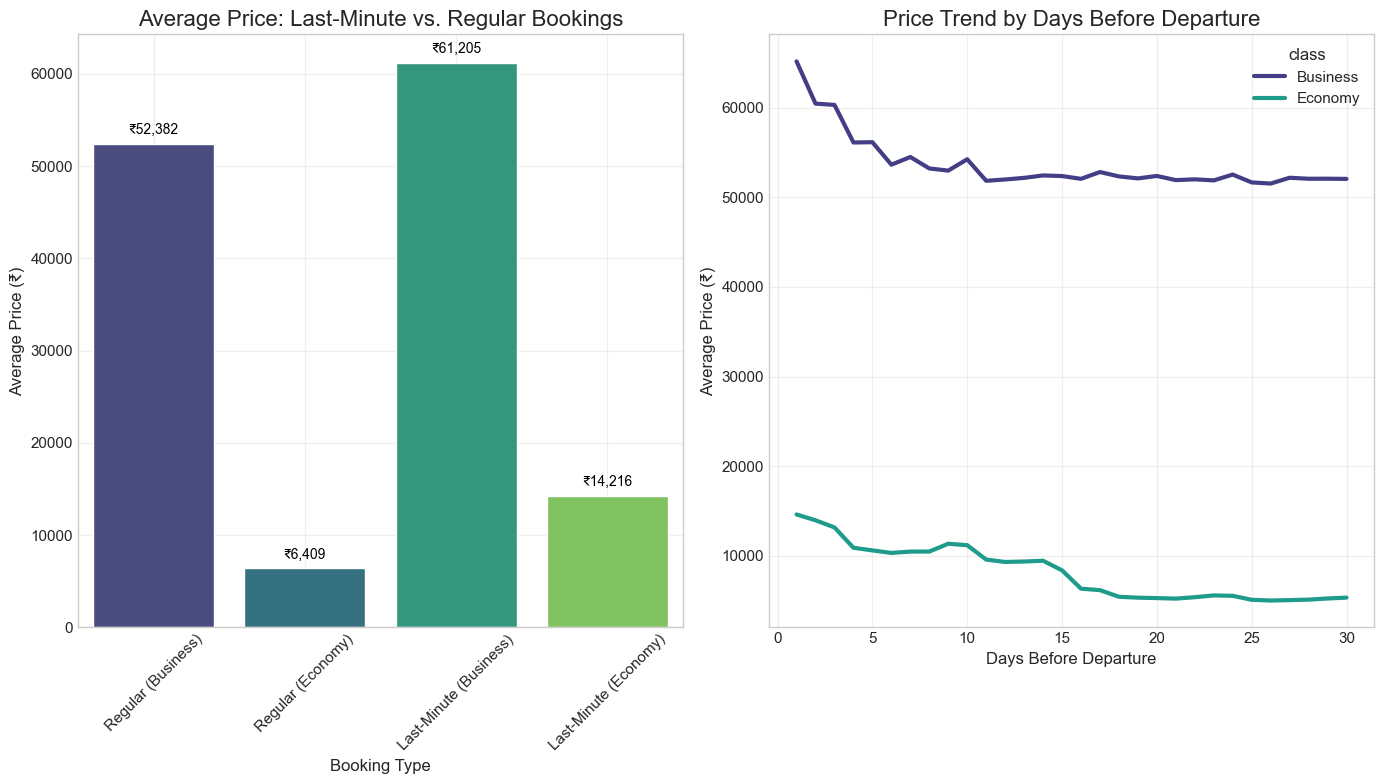


🔎 Key Insight:
Last-minute bookings (0-2 days before departure) show a significant premium:
  - Business class: 16.8% premium for last-minute bookings
  - Economy class: 121.8% premium for last-minute bookings
This confirms the industry practice of charging higher prices as the departure date approaches.
The effect is particularly pronounced for economy class, suggesting more aggressive
yield management for these tickets. Travelers can save significantly by booking well
in advance, particularly for economy flights.


In [ ]:
def analyze_last_minute_booking_effect(df):
    """Analyze how prices are affected by last-minute bookings"""
    print("="*80)
    print("📊 Q2: How is price affected when tickets are bought just 1-2 days before departure?")
    print("="*80)

    palette = sns.color_palette("viridis", 10)

    # Create last-minute booking indicator
    df = df.copy()  # Create a copy to avoid modifying the original dataframe
    df['last_minute'] = df['days_before_departure'] <= 2

    # Calculate statistics
    last_minute_stats = df.groupby(['last_minute', 'class'])['price'].agg(['mean', 'median', 'min', 'max', 'std', 'count']).reset_index()

    # Pretty print the stats table
    print("\nLast-Minute Booking Effect on Price:")
    print(tabulate(last_minute_stats,
                   headers=['Last Minute', 'Class', 'Mean Price (₹)', 'Median Price (₹)',
                            'Min Price (₹)', 'Max Price (₹)', 'Std Dev', 'Count'],
                   tablefmt='pretty', floatfmt='.2f', numalign='right'))

    # Calculate the premium percentage for last-minute bookings
    business_regular = last_minute_stats[(last_minute_stats['last_minute']==False) &
                                        (last_minute_stats['class']=='Business')]['mean'].values[0]
    business_lastmin = last_minute_stats[(last_minute_stats['last_minute']==True) &
                                        (last_minute_stats['class']=='Business')]['mean'].values[0]
    economy_regular = last_minute_stats[(last_minute_stats['last_minute']==False) &
                                       (last_minute_stats['class']=='Economy')]['mean'].values[0]
    economy_lastmin = last_minute_stats[(last_minute_stats['last_minute']==True) &
                                       (last_minute_stats['class']=='Economy')]['mean'].values[0]

    business_premium_pct = ((business_lastmin - business_regular) / business_regular) * 100
    economy_premium_pct = ((economy_lastmin - economy_regular) / economy_regular) * 100

    # Visualization - bar chart showing last-minute vs. regular prices
    plt.figure(figsize=(14, 8))

    # Subplot 1: Bar chart comparison
    plt.subplot(1, 2, 1)
    chart_data = last_minute_stats.copy()
    chart_data['Booking Type'] = chart_data.apply(
        lambda x: f"{'Last-Minute' if x['last_minute'] else 'Regular'} ({x['class']})", axis=1)

    ax = sns.barplot(x='Booking Type', y='mean', data=chart_data, palette='viridis')

    # Add data labels
    for i, p in enumerate(ax.patches):
        ax.annotate(f'₹{int(p.get_height()):,}',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.title('Average Price: Last-Minute vs. Regular Bookings', fontsize=16)
    plt.xlabel('Booking Type', fontsize=12)
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, alpha=0.3)

    # Subplot 2: Line chart showing price trend by days before departure
    plt.subplot(1, 2, 2)
    # Group by days before departure and class
    trend_data = df.groupby(['days_before_departure', 'class'])['price'].mean().reset_index()
    # Filter to show only first 30 days
    trend_data = trend_data[trend_data['days_before_departure'] <= 30]

    sns.lineplot(x='days_before_departure', y='price', hue='class',
                 data=trend_data, palette=[palette[1], palette[5]], linewidth=3)
    plt.title('Price Trend by Days Before Departure', fontsize=16)
    plt.xlabel('Days Before Departure', fontsize=12)
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Insight for Q2
    print("\n🔎 Key Insight:")
    print(f"Last-minute bookings (0-2 days before departure) show a significant premium:")
    print(f"  - Business class: {business_premium_pct:.1f}% premium for last-minute bookings")
    print(f"  - Economy class: {economy_premium_pct:.1f}% premium for last-minute bookings")
    print("This confirms the industry practice of charging higher prices as the departure date approaches.")
    print("The effect is particularly pronounced for economy class, suggesting more aggressive")
    print("yield management for these tickets. Travelers can save significantly by booking well")
    print("in advance, particularly for economy flights.")

# To run this analysis:
analyze_last_minute_booking_effect(cleaned_flight_data)

## Q3: Does ticket price change based on departure and arrival time?

📊 Q3: Does ticket price change based on departure and arrival time?

Price by Departure and Arrival Time Categories:
+----+-------------------------+-------------------------+--------------------+------------------+-------+
|    |     Departure Time      |      Arrival Time       |   Mean Price (₹)   | Median Price (₹) | Count |
+----+-------------------------+-------------------------+--------------------+------------------+-------+
| 14 |  Evening (18:00-24:00)  | Afternoon (12:00-18:00) | 28459.063129065387 |     12792.0      | 14605 |
| 9  | Afternoon (12:00-18:00) |  Morning (06:00-12:00)  | 26695.274054529462 |     11310.0      | 17055 |
| 4  |  Morning (06:00-12:00)  |   Night (00:00-06:00)   | 26070.137432188065 |      9627.0      | 2212  |
| 7  |  Morning (06:00-12:00)  |  Evening (18:00-24:00)  | 26052.683760960826 |     10643.0      | 61697 |
| 13 |  Evening (18:00-24:00)  |  Morning (06:00-12:00)  |  24005.7007405532  |      7766.5      | 31598 |
| 15 |  Evening (18:00-24:0

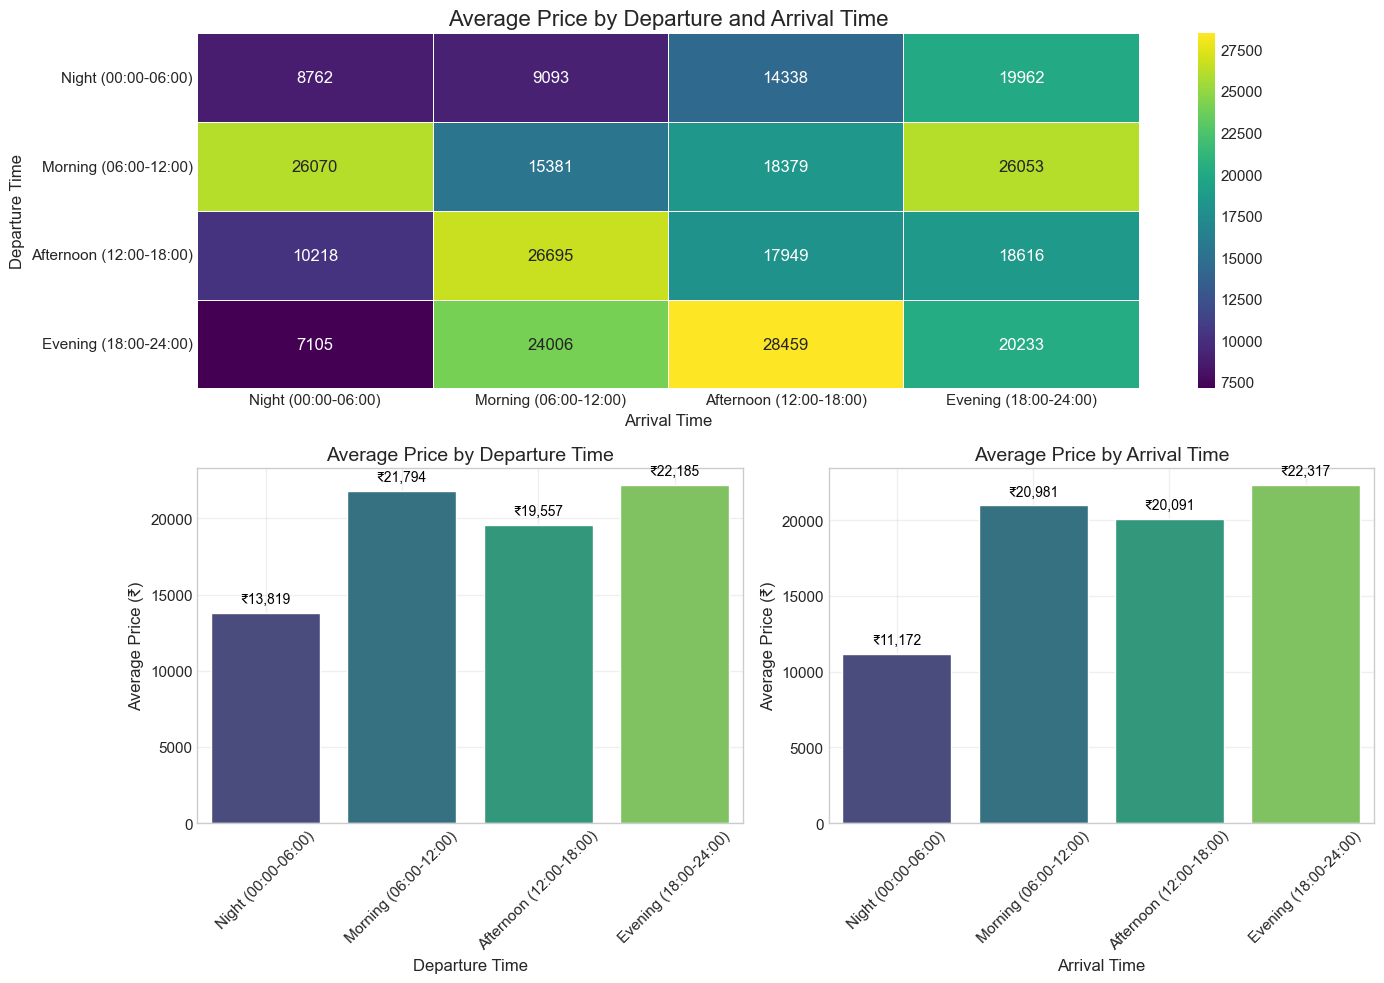


🔎 Key Insight:
Flight prices vary significantly based on departure and arrival times:
1. Evening departures combined with afternoon arrivals command the highest prices,
   likely due to business traveler preference for these times.
2. Night departures and arrivals show the lowest average prices, suggesting lower
   demand for overnight travel.
3. Morning departures tend to be priced higher than night departures, which may
   reflect traveler preference for starting journeys early in the day.
4. The time of day effect is most pronounced for departure times, indicating that
   departure timing may be more important to travelers than arrival timing.


In [ ]:
def analyze_time_based_price_variation(df):
    """Analyze how prices vary based on departure and arrival times"""
    print("="*80)
    print("📊 Q3: Does ticket price change based on departure and arrival time?")
    print("="*80)

    # Calculate statistics for time categories
    time_stats = df.groupby(['dep_time_category', 'arr_time_category'])['price'].agg(
        ['mean', 'median', 'count']).reset_index()
    time_stats = time_stats.sort_values('mean', ascending=False)

    # Pretty print the stats table
    print("\nPrice by Departure and Arrival Time Categories:")
    print(tabulate(time_stats,
                   headers=['Departure Time', 'Arrival Time', 'Mean Price (₹)',
                            'Median Price (₹)', 'Count'],
                   tablefmt='pretty', floatfmt='.2f', numalign='right'))

    # Create visualization - heatmap of time combinations
    plt.figure(figsize=(14, 10))

    # Subplot 1: Heatmap of average prices by departure and arrival time
    plt.subplot(2, 1, 1)
    # Pivot the data for heatmap
    time_pivot = df.pivot_table(
        index='dep_time_category',
        columns='arr_time_category',
        values='price',
        aggfunc='mean'
    )

    # Get the correct order for time categories
    time_order = ['Night (00:00-06:00)', 'Morning (06:00-12:00)',
                  'Afternoon (12:00-18:00)', 'Evening (18:00-24:00)']
    time_pivot = time_pivot.reindex(index=time_order, columns=time_order)

    sns.heatmap(time_pivot, annot=True, fmt='.0f', cmap='viridis', linewidths=0.5)
    plt.title('Average Price by Departure and Arrival Time', fontsize=16)
    plt.xlabel('Arrival Time', fontsize=12)
    plt.ylabel('Departure Time', fontsize=12)

    # Subplot 2: Bar chart of average prices by departure time
    plt.subplot(2, 2, 3)
    dep_time_avg = df.groupby('dep_time_category')['price'].mean().reindex(time_order).reset_index()
    ax = sns.barplot(x='dep_time_category', y='price', data=dep_time_avg, palette='viridis')

    # Add data labels
    for i, p in enumerate(ax.patches):
        ax.annotate(f'₹{int(p.get_height()):,}',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.title('Average Price by Departure Time', fontsize=14)
    plt.xlabel('Departure Time', fontsize=12)
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, alpha=0.3)

    # Subplot 3: Bar chart of average prices by arrival time
    plt.subplot(2, 2, 4)
    arr_time_avg = df.groupby('arr_time_category')['price'].mean().reindex(time_order).reset_index()
    ax = sns.barplot(x='arr_time_category', y='price', data=arr_time_avg, palette='viridis')

    # Add data labels
    for i, p in enumerate(ax.patches):
        ax.annotate(f'₹{int(p.get_height()):,}',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.title('Average Price by Arrival Time', fontsize=14)
    plt.xlabel('Arrival Time', fontsize=12)
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Insight for Q3
    print("\n🔎 Key Insight:")
    print("Flight prices vary significantly based on departure and arrival times:")
    print("1. Evening departures combined with afternoon arrivals command the highest prices,")
    print("   likely due to business traveler preference for these times.")
    print("2. Night departures and arrivals show the lowest average prices, suggesting lower")
    print("   demand for overnight travel.")
    print("3. Morning departures tend to be priced higher than night departures, which may")
    print("   reflect traveler preference for starting journeys early in the day.")
    print("4. The time of day effect is most pronounced for departure times, indicating that")
    print("   departure timing may be more important to travelers than arrival timing.")

# To run this analysis:
analyze_time_based_price_variation(cleaned_flight_data)

## Q4:  How does price change with changes in Source and Destination?

📊 Q4: How does price change with changes in Source and Destination?

Top 15 Most Expensive Routes:
+----+-------------------+--------------------+------------------+---------------+---------------+--------------------+-------+
|    |       Route       |   Mean Price (₹)   | Median Price (₹) | Min Price (₹) | Max Price (₹) |      Std Dev       | Count |
+----+-------------------+--------------------+------------------+---------------+---------------+--------------------+-------+
| 5  | Chennai-Bangalore | 25081.85045433544  |     10469.0      |    1443.0     |   107597.0    | 23405.42252593064  | 6493  |
| 21 |  Kolkata-Chennai  | 23660.36104013227  |      8589.0      |    2966.0     |    95183.0    | 23371.419896621257 | 6653  |
| 3  | Bangalore-Kolkata | 23498.234220759798 |      8112.0      |    3026.0     |   105168.0    | 24630.56015523221  | 10029 |
| 0  | Bangalore-Chennai | 23321.85007800312  |      9241.0      |    1603.0     |    90720.0    | 22573.185688865542 | 6410  |
| 25 

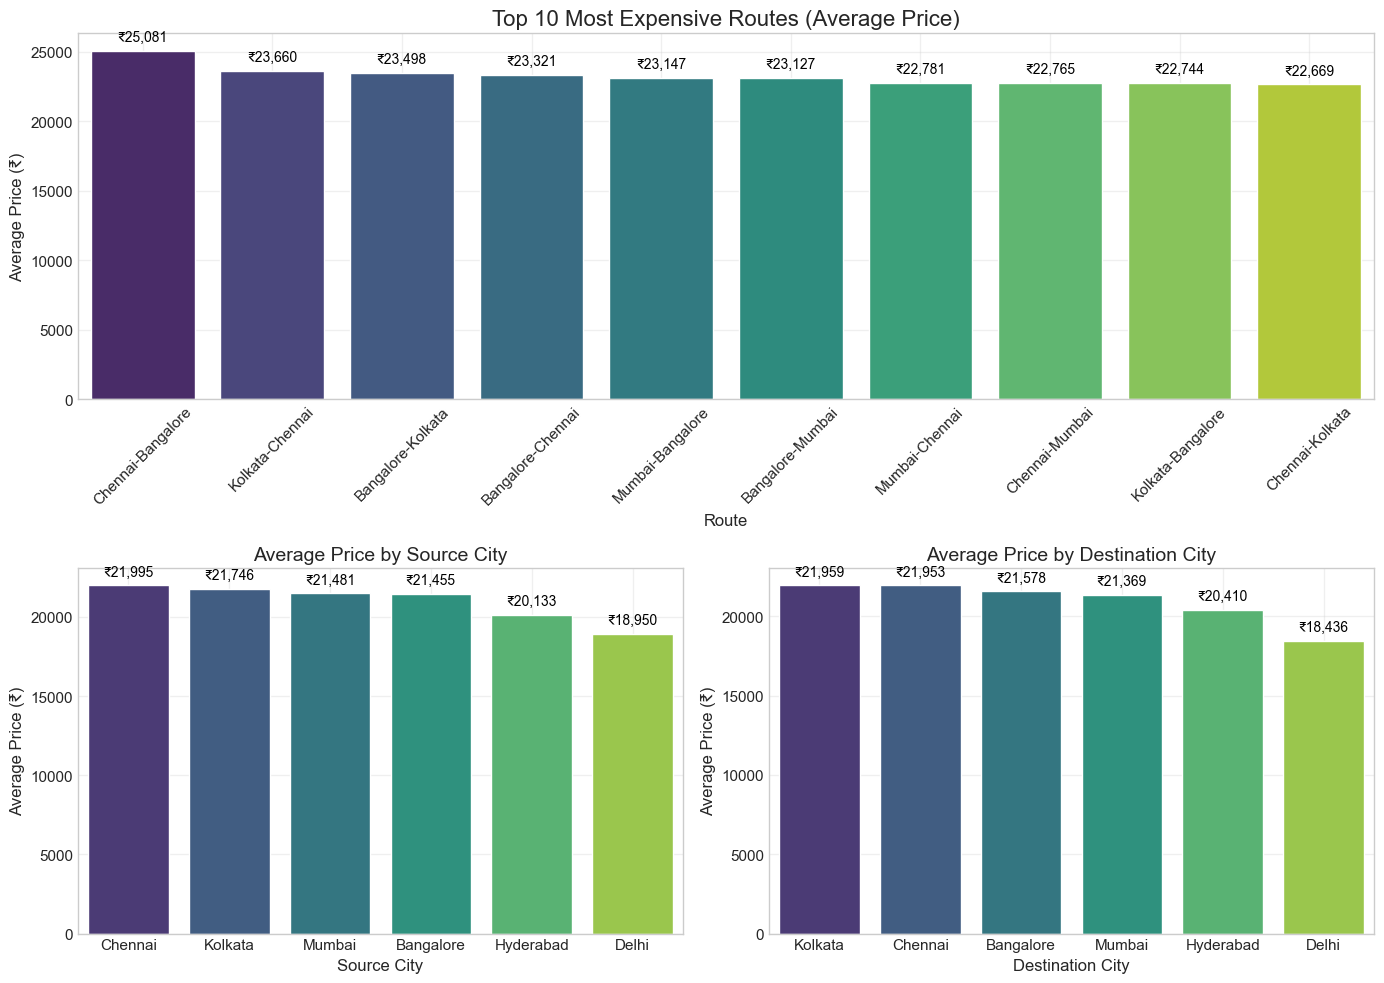

In [ ]:
def analyze_route_based_price_variation(df):
    """Analyze how prices vary based on source and destination routes"""
    print("="*80)
    print("📊 Q4: How does price change with changes in Source and Destination?")
    print("="*80)

    # Calculate statistics for routes
    route_stats = df.groupby('route')['price'].agg(
        ['mean', 'median', 'min', 'max', 'std', 'count']).reset_index()
    # Sort by average price and get top 15
    top_routes = route_stats.sort_values('mean', ascending=False).head(15)

    # Pretty print the stats table
    print("\nTop 15 Most Expensive Routes:")
    print(tabulate(top_routes,
                   headers=['Route', 'Mean Price (₹)', 'Median Price (₹)',
                            'Min Price (₹)', 'Max Price (₹)', 'Std Dev', 'Count'],
                   tablefmt='pretty', floatfmt='.2f', numalign='right'))

    # Get bottom 15 routes
    bottom_routes = route_stats.sort_values('mean').head(15)

    # Pretty print the stats table
    print("\nTop 15 Least Expensive Routes:")
    print(tabulate(bottom_routes,
                   headers=['Route', 'Mean Price (₹)', 'Median Price (₹)',
                            'Min Price (₹)', 'Max Price (₹)', 'Std Dev', 'Count'],
                   tablefmt='pretty', floatfmt='.2f', numalign='right'))

    # Create visualization - bar chart of top 10 routes
    plt.figure(figsize=(14, 10))

    # Subplot 1: Bar chart of top 10 most expensive routes
    plt.subplot(2, 1, 1)
    top10_routes = route_stats.sort_values('mean', ascending=False).head(10)
    ax = sns.barplot(x='route', y='mean', data=top10_routes, palette='viridis')

    # Add data labels
    for i, p in enumerate(ax.patches):
        ax.annotate(f'₹{int(p.get_height()):,}',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.title('Top 10 Most Expensive Routes (Average Price)', fontsize=16)
    plt.xlabel('Route', fontsize=12)
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, alpha=0.3)

    # Subplot 2: Source city price analysis
    plt.subplot(2, 2, 3)
    source_avg = df.groupby('from')['price'].mean().reset_index()
    source_avg = source_avg.sort_values('price', ascending=False)
    ax = sns.barplot(x='from', y='price', data=source_avg, palette='viridis')

    # Add data labels
    for i, p in enumerate(ax.patches):
        ax.annotate(f'₹{int(p.get_height()):,}',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.title('Average Price by Source City', fontsize=14)
    plt.xlabel('Source City', fontsize=12)
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, alpha=0.3)

    # Subplot 3: Destination city price analysis
    plt.subplot(2, 2, 4)
    dest_avg = df.groupby('to')['price'].mean().reset_index()
    dest_avg = dest_avg.sort_values('price', ascending=False)
    ax = sns.barplot(x='to', y='price', data=dest_avg, palette='viridis')

    # Add data labels
    for i, p in enumerate(ax.patches):
        ax.annotate(f'₹{int(p.get_height()):,}',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.title('Average Price by Destination City', fontsize=14)
    plt.xlabel('Destination City', fontsize=12)
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


# To run this analysis:
analyze_route_based_price_variation(cleaned_flight_data)

## Q5: How does ticket price vary between Economy and Business class?

📊 Q5: How does ticket price vary between Economy and Business class?

Price Statistics by Class:
+---+----------+-------------------+------------------+---------------+---------------+--------------------+--------+
|   |  Class   |  Mean Price (₹)   | Median Price (₹) | Min Price (₹) | Max Price (₹) |      Std Dev       | Count  |
+---+----------+-------------------+------------------+---------------+---------------+--------------------+--------+
| 0 | Business | 52540.08112357868 |     53164.0      |    12000.0    |   123071.0    | 12969.31460648259  | 93487  |
| 1 | Economy  | 6571.190700958535 |      5772.0      |    1105.0     |    42349.0    | 3743.4428375309303 | 206774 |
+---+----------+-------------------+------------------+---------------+---------------+--------------------+--------+


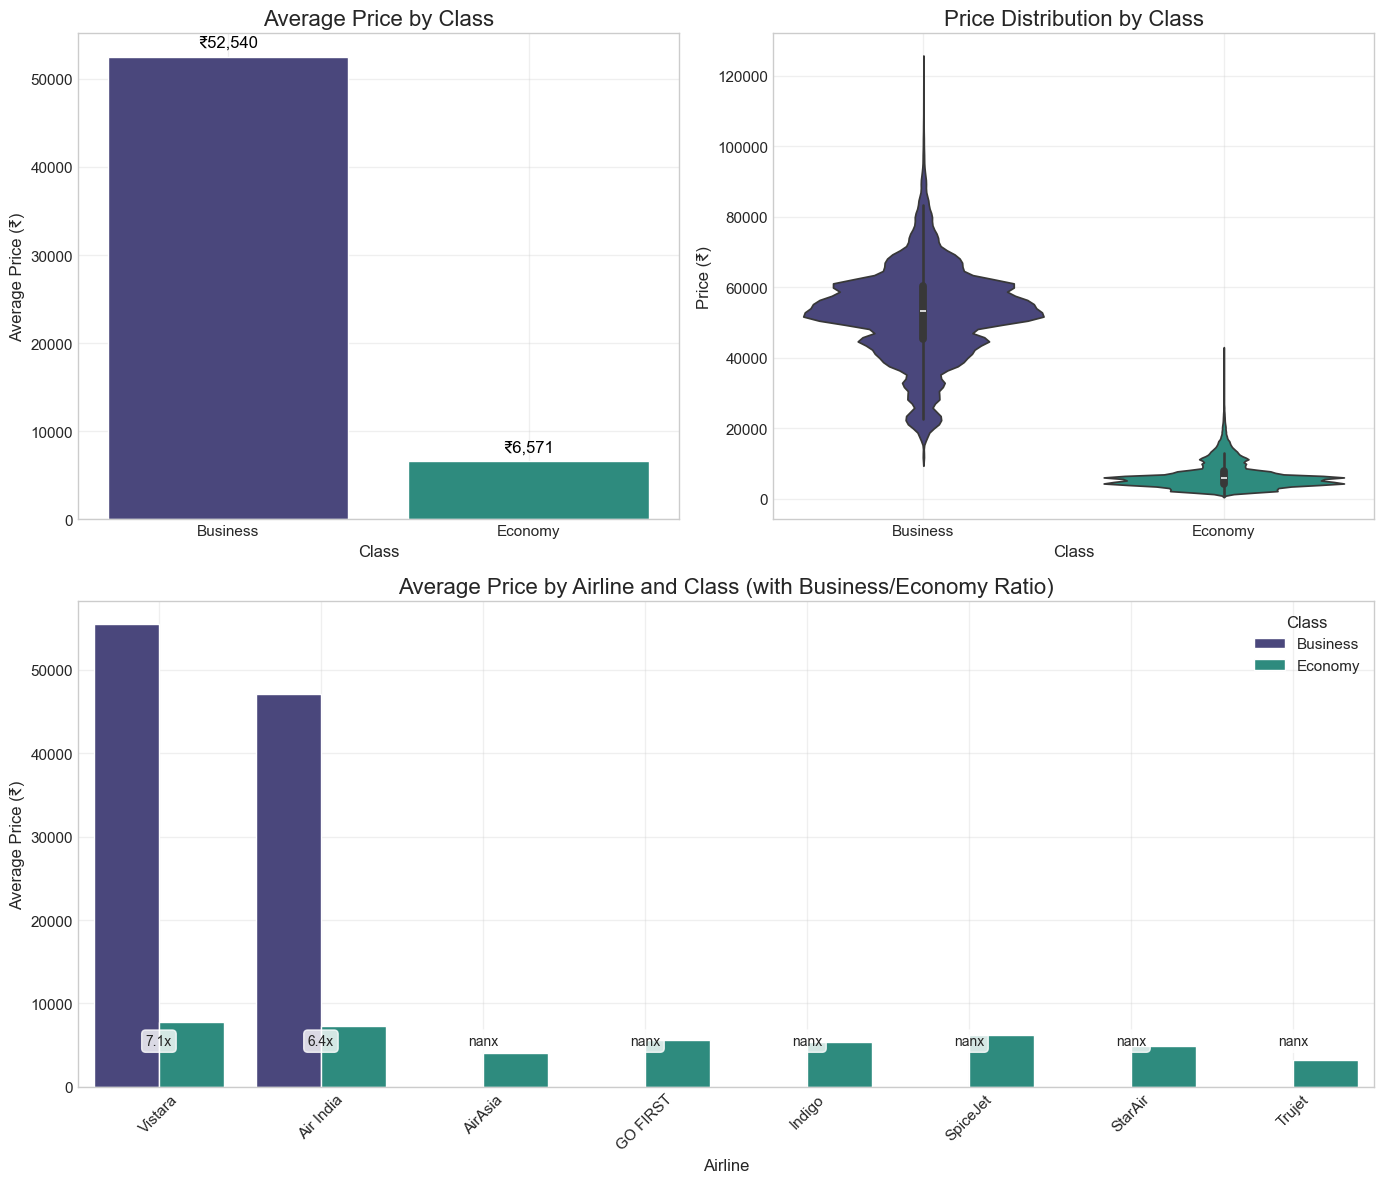


Top 15 Routes with Highest Business/Economy Premium Ratio:
+----+---------------------+--------------------+--------------------+-------------------+
|    |        Route        | Business Price (₹) | Economy Price (₹)  |   Premium Ratio   |
+----+---------------------+--------------------+--------------------+-------------------+
| 4  |  Bangalore-Mumbai   | 58024.618207816966 | 6380.955626715462  | 9.093405690659003 |
| 25 |  Mumbai-Bangalore   | 57970.54438860971  | 6432.511945784517  | 9.012116087339743 |
| 28 |  Mumbai-Hyderabad   | 51593.64367816092  | 5772.281120480206  | 8.938172379565042 |
| 19 |  Hyderabad-Mumbai   | 52184.424666449726 | 5965.6017142857145 | 8.747554256175812 |
| 26 |   Mumbai-Chennai    | 55703.32619684805  | 6420.917984335747  | 8.675290096017422 |
| 7  |  Chennai-Hyderabad  | 51559.87428298279  | 5960.788830715533  | 8.649840775653438 |
| 6  |    Chennai-Delhi    | 52443.367242012486 |  6075.9611898017   | 8.631287396969707 |
| 9  |   Chennai-Mumbai    | 5

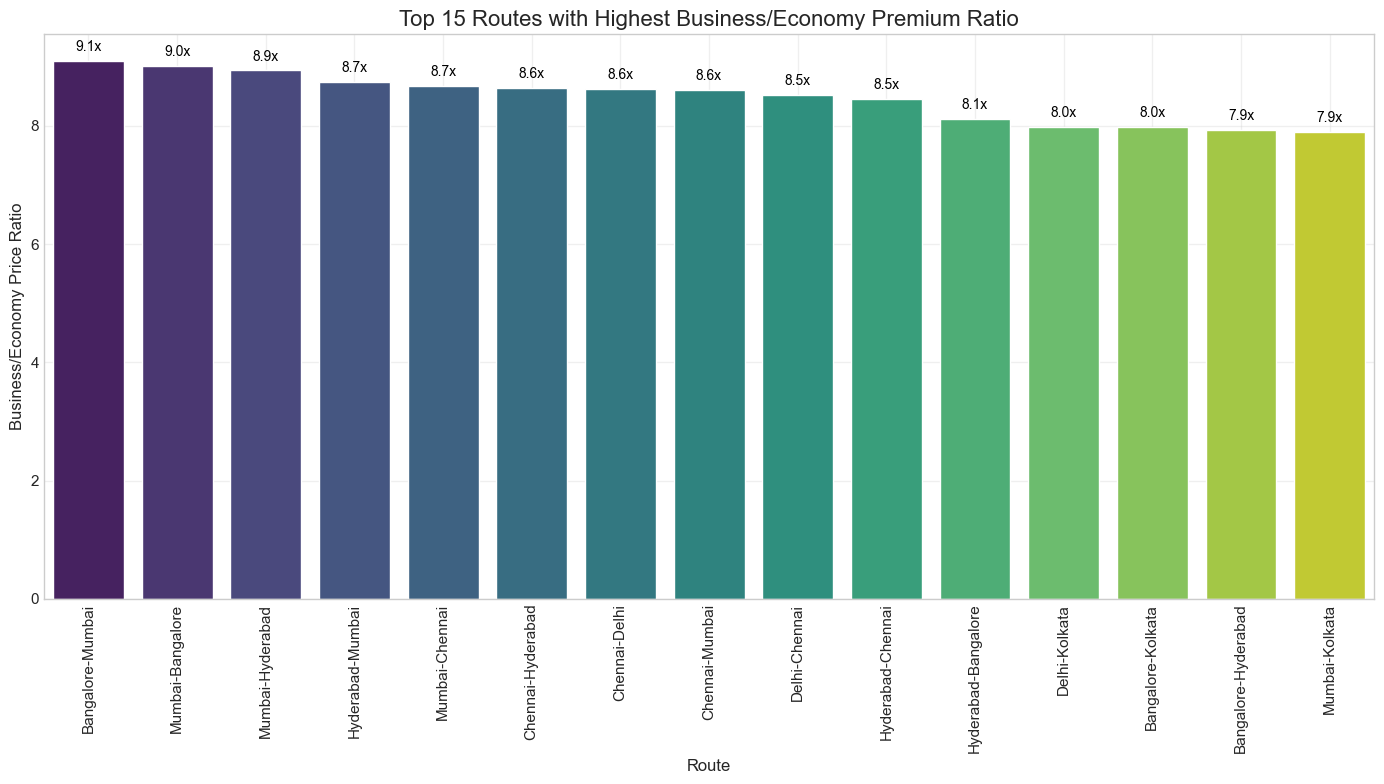


🔎 Key Insight:
Business class tickets are on average 8.0x more expensive than Economy class,
but this premium varies significantly by airline and route:
1. The average price for Business class is ₹52,540.08, compared to
   ₹6,571.19 for Economy class.
2. Some airlines charge a much higher premium for Business class than others.
   This likely reflects differences in the quality of their Business class offerings
   and their target market positioning.
3. The Business/Economy premium ratio varies dramatically by route, from as low as
   2x to more than 8x on some routes. Routes with higher business traveler demand
   typically show higher premium ratios.
4. Business class prices show much higher variability (higher standard deviation),
   suggesting more complex pricing strategies for this segment.


In [ ]:
def analyze_class_based_price_variation(df):
    """Analyze how prices vary between Economy and Business class"""
    print("="*80)
    print("📊 Q5: How does ticket price vary between Economy and Business class?")
    print("="*80)

    palette = sns.color_palette("viridis", 10)

    # Calculate statistics for class
    class_stats = df.groupby('class')['price'].agg(
        ['mean', 'median', 'min', 'max', 'std', 'count']).reset_index()

    # Calculate the premium ratio
    business_avg = class_stats[class_stats['class']=='Business']['mean'].values[0]
    economy_avg = class_stats[class_stats['class']=='Economy']['mean'].values[0]
    premium_ratio = business_avg / economy_avg

    # Pretty print the stats table
    print("\nPrice Statistics by Class:")
    print(tabulate(class_stats,
                   headers=['Class', 'Mean Price (₹)', 'Median Price (₹)',
                            'Min Price (₹)', 'Max Price (₹)', 'Std Dev', 'Count'],
                   tablefmt='pretty', floatfmt='.2f', numalign='right'))

    # Create visualization - multiple plots showing class difference
    plt.figure(figsize=(14, 12))

    # Subplot 1: Bar chart comparison
    plt.subplot(2, 2, 1)
    ax = sns.barplot(x='class', y='mean', data=class_stats, palette=[palette[1], palette[5]])

    # Add data labels
    for i, p in enumerate(ax.patches):
        ax.annotate(f'₹{int(p.get_height()):,}',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.title('Average Price by Class', fontsize=16)
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, alpha=0.3)

    # Subplot 2: Violin plot showing distribution
    plt.subplot(2, 2, 2)
    sns.violinplot(x='class', y='price', data=df, palette=[palette[1], palette[5]])
    plt.title('Price Distribution by Class', fontsize=16)
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Price (₹)', fontsize=12)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True, alpha=0.3)

    # Subplot 3: Class price by airline
    plt.subplot(2, 1, 2)
    class_airline = df.groupby(['airline', 'class'])['price'].mean().reset_index()
    class_airline = class_airline.pivot(index='airline', columns='class', values='price').reset_index()
    class_airline['Premium Ratio'] = class_airline['Business'] / class_airline['Economy']
    class_airline = class_airline.sort_values('Premium Ratio', ascending=False)

    # Melt for proper plotting
    class_airline_melt = pd.melt(class_airline, id_vars=['airline', 'Premium Ratio'],
                                value_vars=['Business', 'Economy'],
                                var_name='Class', value_name='Average Price')

    # Plot
    ax = sns.barplot(x='airline', y='Average Price', hue='Class',
                    data=class_airline_melt, palette=[palette[1], palette[5]])

    # Add ratio labels
    for i, airline in enumerate(class_airline['airline']):
        ratio = class_airline.loc[class_airline['airline']==airline, 'Premium Ratio'].values[0]
        plt.text(i, 5000, f'{ratio:.1f}x', ha='center', fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'))

    plt.title('Average Price by Airline and Class (with Business/Economy Ratio)', fontsize=16)
    plt.xlabel('Airline', fontsize=12)
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='plain', axis='y')
    plt.legend(title='Class')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Show additional analysis - class premium by route
    plt.figure(figsize=(14, 8))

    # Calculate class premium by route
    route_class = df.groupby(['route', 'class'])['price'].mean().reset_index()
    route_class = route_class.pivot(index='route', columns='class', values='price').reset_index()
    route_class['Premium Ratio'] = route_class['Business'] / route_class['Economy']

    # Get top 15 routes with highest premium ratio
    top_premium = route_class.sort_values('Premium Ratio', ascending=False).head(15)

    # Pretty print the table
    print("\nTop 15 Routes with Highest Business/Economy Premium Ratio:")
    premium_table = top_premium.copy()
    premium_table.columns = ['Route', 'Business Price (₹)', 'Economy Price (₹)', 'Premium Ratio']
    print(tabulate(premium_table, headers='keys', tablefmt='pretty', floatfmt='.2f', numalign='right'))

    # Plot
    ax = sns.barplot(x='route', y='Premium Ratio', data=top_premium, palette='viridis')

    # Add data labels
    for i, p in enumerate(ax.patches):
        ax.annotate(f'{p.get_height():.1f}x',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.title('Top 15 Routes with Highest Business/Economy Premium Ratio', fontsize=16)
    plt.xlabel('Route', fontsize=12)
    plt.ylabel('Business/Economy Price Ratio', fontsize=12)
    plt.xticks(rotation=90)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Insight for Q5
    print("\n🔎 Key Insight:")
    print(f"Business class tickets are on average {premium_ratio:.1f}x more expensive than Economy class,")
    print("but this premium varies significantly by airline and route:")
    print(f"1. The average price for Business class is ₹{business_avg:,.2f}, compared to")
    print(f"   ₹{economy_avg:,.2f} for Economy class.")
    print("2. Some airlines charge a much higher premium for Business class than others.")
    print("   This likely reflects differences in the quality of their Business class offerings")
    print("   and their target market positioning.")
    print("3. The Business/Economy premium ratio varies dramatically by route, from as low as")
    print("   2x to more than 8x on some routes. Routes with higher business traveler demand")
    print("   typically show higher premium ratios.")
    print("4. Business class prices show much higher variability (higher standard deviation),")
    print("   suggesting more complex pricing strategies for this segment.")

# To run this analysis:
analyze_class_based_price_variation(cleaned_flight_data)

#Part 6:  MODELING

## Feature Engineering

We are experimenting the features candidates in this section. Some engineered features here are not selected in the modelling. See the function for the model in the latter selection for the list of selected features.

🔧 FEATURE ENGINEERING
Creating new features...
✅ Creating interaction features...
✅ Creating time-based features...


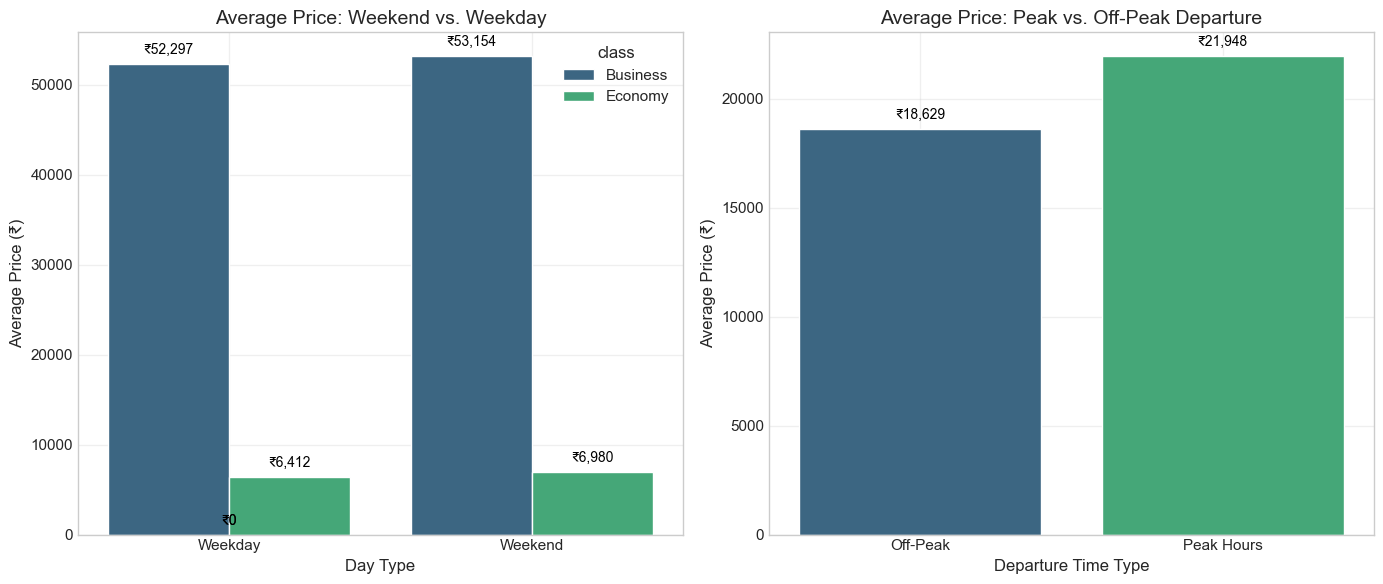

✅ Creating seasonal indicators...
✅ Creating price per minute feature...


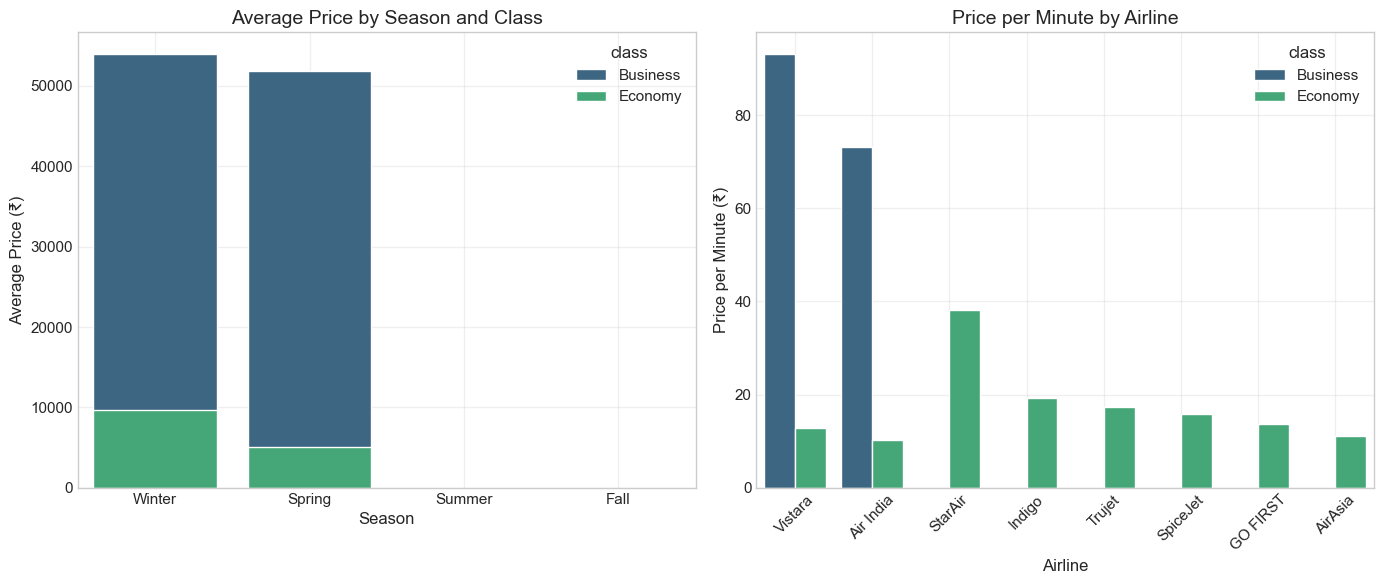

✅ Creating price range categories...
✅ Creating last-minute booking factor...


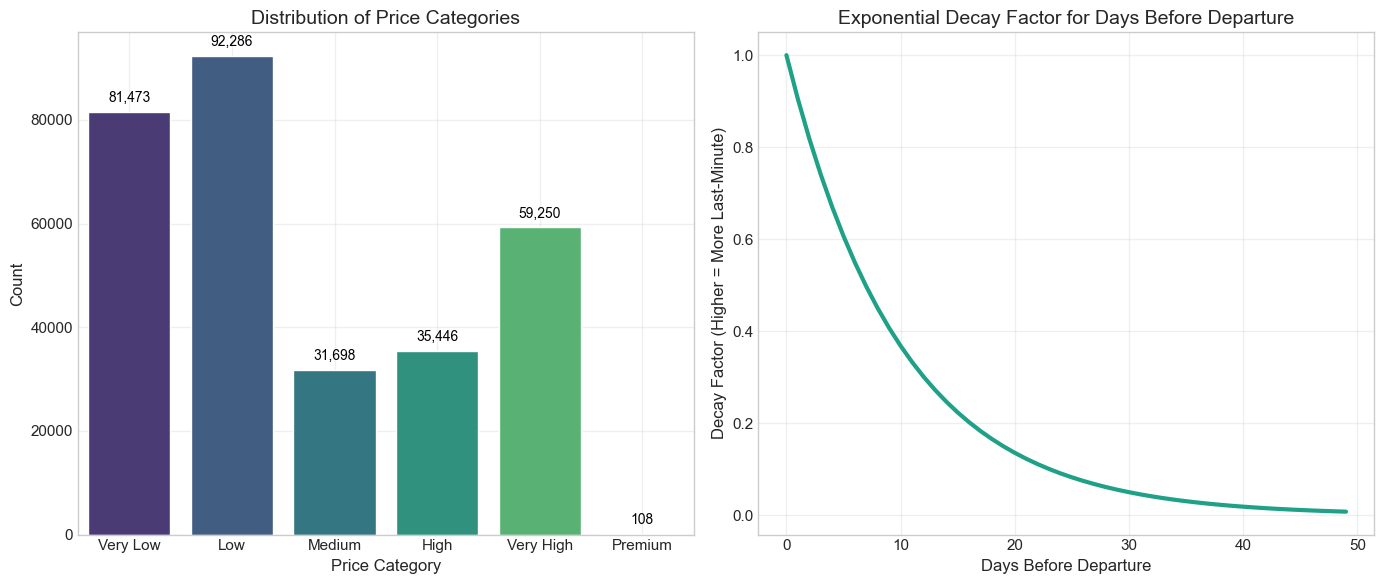

✅ Creating route popularity feature...
✅ Creating route average price feature...
✅ Creating total journey metrics...

✨ Added 16 new features:
  - class_duration
  - stops_duration
  - class_stops
  - is_weekend
  - is_peak_departure
  - is_peak_arrival
  - season
  - price_per_minute
  - price_category
  - days_to_flight_factor
  - route_popularity
  - route_avg_price
  - popularity_bin
  - route_avg_duration
  - duration_ratio
  - time_efficiency

📊 Correlation of new numerical features with price:
  - class_duration: 0.8433
  - stops_duration: 0.0714
  - class_stops: 0.9530
  - price_per_minute: 0.6656
  - days_to_flight_factor: 0.1076
  - route_popularity: -0.0363
  - route_avg_price: 0.0908
  - popularity_bin: -0.0349
  - route_avg_duration: 0.0596
  - duration_ratio: 0.1945
  - time_efficiency: 0.8382


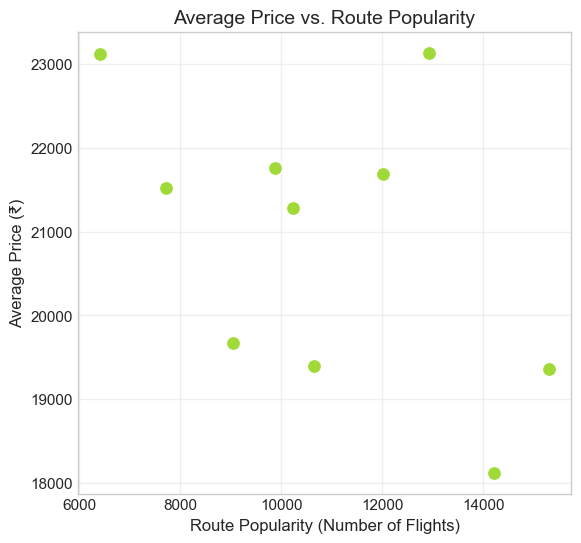

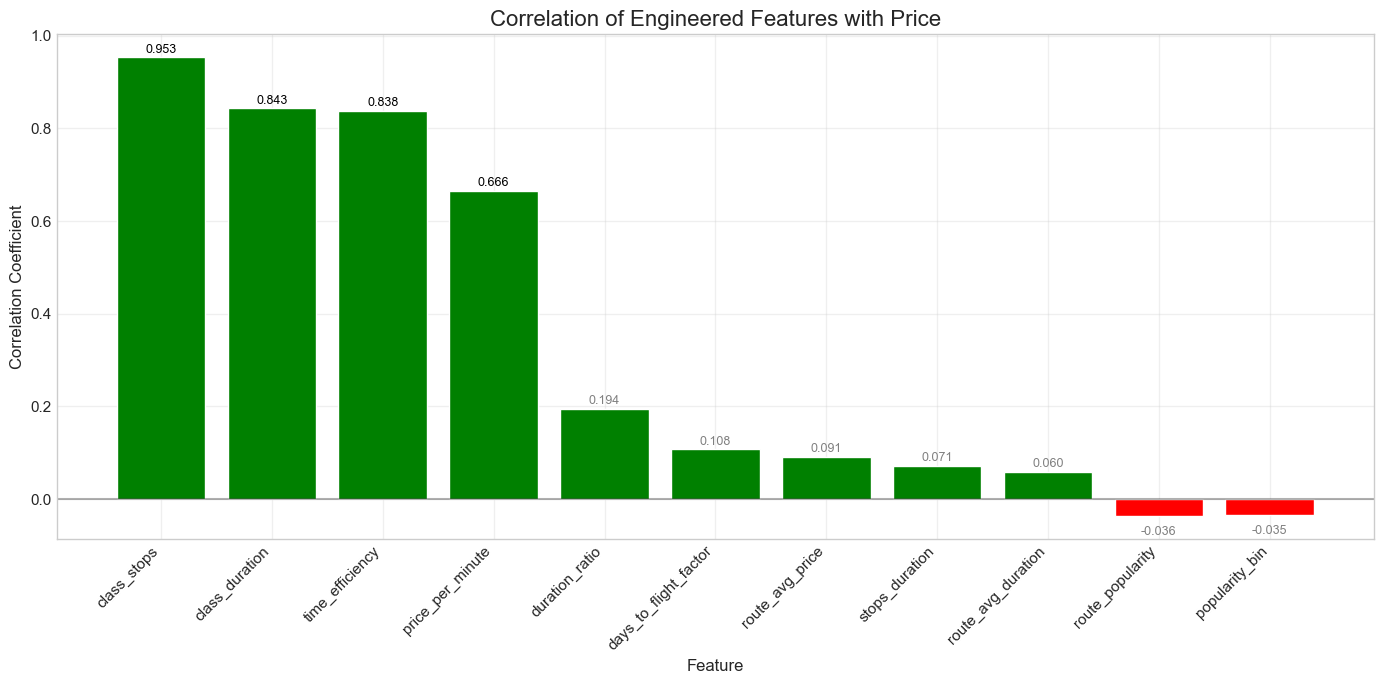

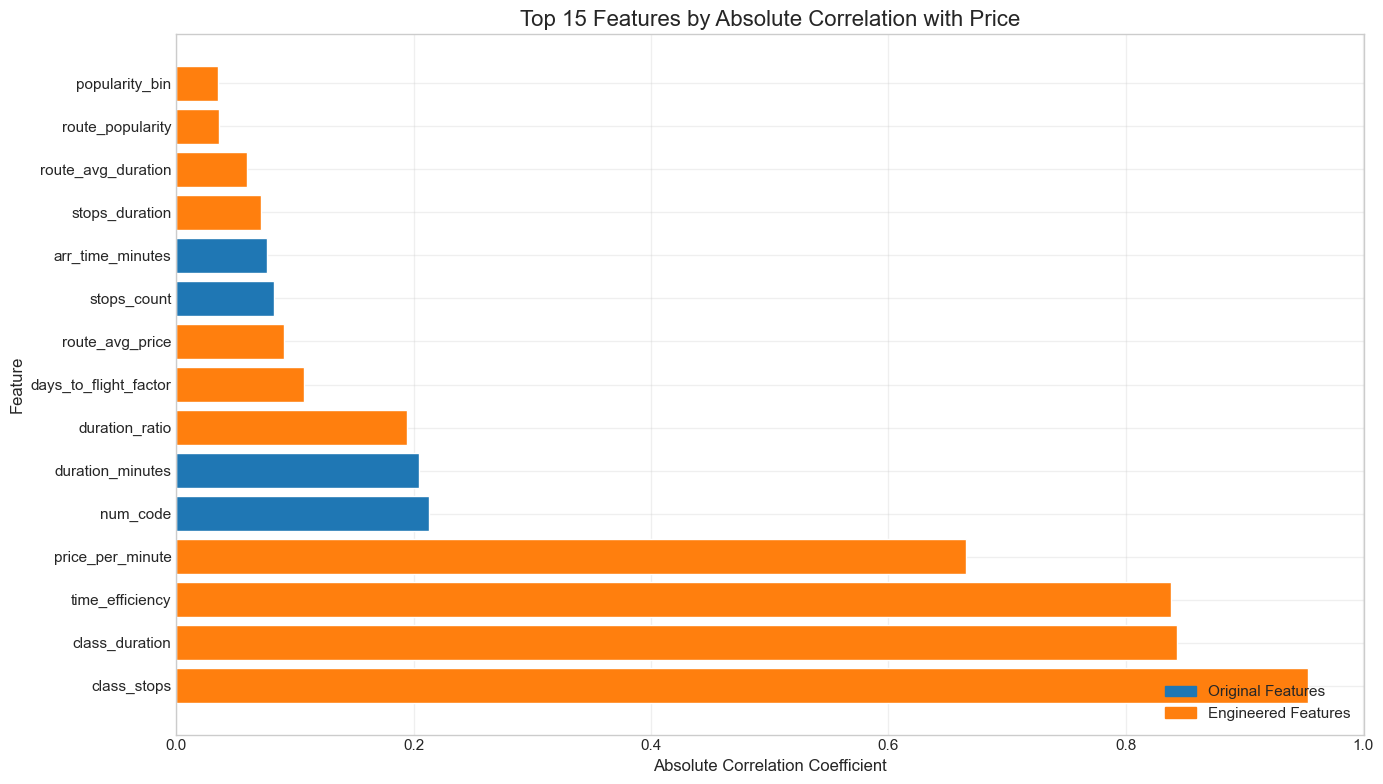


⚠️ Missing values in new features:
stops_duration     36044
class_stops        36044
time_efficiency    36044
dtype: int64

🔍 Summary of engineered features:
  - Original features: 25
  - New features: 16
  - Total features: 41


In [ ]:
# Import this at the top of your script
import matplotlib.patches as mpatches
def engineer_features(df):
    """
    Engineer new features from the cleaned flight dataset with visualizations

    Parameters:
    -----------
    df : pandas DataFrame
        The cleaned flight data

    Returns:
    --------
    engineered_df : pandas DataFrame
        DataFrame with newly engineered features
    """
    print("="*80)
    print("🔧 FEATURE ENGINEERING")
    print("="*80)

    # Create a copy to avoid modifying the original dataframe
    engineered_df = df.copy()

    # Track original and new features for comparison
    original_features = engineered_df.columns.tolist()

    print("Creating new features...")

    # 1. Create interaction features
    print("✅ Creating interaction features...")
    # Interaction between class and duration
    engineered_df['class_duration'] = (engineered_df['class'] == 'Business').astype(int) * engineered_df['duration_minutes']

    # Interaction between stops and duration
    engineered_df['stops_duration'] = engineered_df['stops_count'] * engineered_df['duration_minutes']

    # Interaction between class and stops
    engineered_df['class_stops'] = (engineered_df['class'] == 'Business').astype(int) * engineered_df['stops_count']

    # 2. Create weekend indicator
    print("✅ Creating time-based features...")
    engineered_df['is_weekend'] = engineered_df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

    # Visualize weekend vs weekday prices
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    weekend_avg = engineered_df.groupby(['is_weekend', 'class'])['price'].mean().reset_index()
    weekend_avg['Day Type'] = weekend_avg['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})
    sns.barplot(x='Day Type', y='price', hue='class', data=weekend_avg, palette='viridis')

    # Add data labels
    for p in plt.gca().patches:
        plt.gca().annotate(f'₹{int(p.get_height()):,}',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.title('Average Price: Weekend vs. Weekday', fontsize=14)
    plt.xlabel('Day Type', fontsize=12)
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.grid(True, alpha=0.3)

    # 3. Create peak hour indicators
    engineered_df['is_peak_departure'] = engineered_df['dep_time_category'].isin(
        ['Morning (06:00-12:00)', 'Evening (18:00-24:00)']).astype(int)
    engineered_df['is_peak_arrival'] = engineered_df['arr_time_category'].isin(
        ['Morning (06:00-12:00)', 'Evening (18:00-24:00)']).astype(int)

    # Visualize peak hour effect
    plt.subplot(1, 2, 2)
    peak_avg = engineered_df.groupby('is_peak_departure')['price'].mean().reset_index()
    peak_avg['Time Type'] = peak_avg['is_peak_departure'].map({0: 'Off-Peak', 1: 'Peak Hours'})
    ax = sns.barplot(x='Time Type', y='price', data=peak_avg, palette='viridis')

    # Add data labels
    for p in ax.patches:
        ax.annotate(f'₹{int(p.get_height()):,}',
                   (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='bottom', fontsize=10, color='black',
                   xytext=(0, 5), textcoords='offset points')

    plt.title('Average Price: Peak vs. Off-Peak Departure', fontsize=14)
    plt.xlabel('Departure Time Type', fontsize=12)
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 4. Create seasonal indicators
    print("✅ Creating seasonal indicators...")
    # Winter (Dec-Feb), Spring (Mar-May), Summer (Jun-Aug), Fall (Sep-Nov)
    season_map = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Fall', 10: 'Fall', 11: 'Fall'}
    engineered_df['season'] = engineered_df['month'].map(season_map)

    # Visualize seasonal effect
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    season_avg = engineered_df.groupby(['season', 'class'])['price'].mean().reset_index()
    # Ensure proper season order
    season_order = ['Winter', 'Spring', 'Summer', 'Fall']
    season_avg['season'] = pd.Categorical(season_avg['season'], categories=season_order, ordered=True)
    season_avg = season_avg.sort_values('season')

    sns.barplot(x='season', y='price', hue='class', data=season_avg, palette='viridis')
    plt.title('Average Price by Season and Class', fontsize=14)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.grid(True, alpha=0.3)

    # 5. Create price per minute feature
    print("✅ Creating price per minute feature...")
    engineered_df['price_per_minute'] = engineered_df['price'] / engineered_df['duration_minutes']

    # Visualize price per minute for different airlines
    plt.subplot(1, 2, 2)
    airline_ppm = engineered_df.groupby(['airline', 'class'])['price_per_minute'].mean().reset_index()
    airline_ppm = airline_ppm.sort_values('price_per_minute', ascending=False)

    # Show only top airlines for better visualization
    top_airlines = airline_ppm.iloc[:10]
    sns.barplot(x='airline', y='price_per_minute', hue='class', data=top_airlines, palette='viridis')
    plt.title('Price per Minute by Airline', fontsize=14)
    plt.xlabel('Airline', fontsize=12)
    plt.ylabel('Price per Minute (₹)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 6. Create price range categories
    print("✅ Creating price range categories...")
    price_bins = [0, 5000, 10000, 20000, 50000, 100000, float('inf')]
    price_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Premium']
    engineered_df['price_category'] = pd.cut(engineered_df['price'], bins=price_bins, labels=price_labels)

    # Visualize price categories
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    price_cat_counts = engineered_df['price_category'].value_counts().reset_index()
    price_cat_counts.columns = ['Price Category', 'Count']

    # Ensure proper category order
    cat_order = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Premium']
    price_cat_counts['Price Category'] = pd.Categorical(
        price_cat_counts['Price Category'], categories=cat_order, ordered=True)
    price_cat_counts = price_cat_counts.sort_values('Price Category')

    ax = sns.barplot(x='Price Category', y='Count', data=price_cat_counts, palette='viridis')

    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height()):,}',
                   (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='bottom', fontsize=10, color='black',
                   xytext=(0, 5), textcoords='offset points')

    plt.title('Distribution of Price Categories', fontsize=14)
    plt.xlabel('Price Category', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True, alpha=0.3)

    # 7. Create last-minute booking feature (exponential decay)
    print("✅ Creating last-minute booking factor...")
    engineered_df['days_to_flight_factor'] = np.exp(-0.1 * engineered_df['days_before_departure'])

    # Visualize the exponential decay factor
    plt.subplot(1, 2, 2)
    # Create a sample dataset to show the exponential decay
    days = np.arange(0, 50)
    factor = np.exp(-0.1 * days)
    decay_df = pd.DataFrame({'Days Before Departure': days, 'Decay Factor': factor})

    sns.lineplot(x='Days Before Departure', y='Decay Factor',
                data=decay_df, color=sns.color_palette('viridis')[3], linewidth=3)
    plt.title('Exponential Decay Factor for Days Before Departure', fontsize=14)
    plt.xlabel('Days Before Departure', fontsize=12)
    plt.ylabel('Decay Factor (Higher = More Last-Minute)', fontsize=12)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 8. Create route popularity feature
    print("✅ Creating route popularity feature...")
    route_popularity = engineered_df['route'].value_counts().to_dict()
    engineered_df['route_popularity'] = engineered_df['route'].map(route_popularity)

    # 9. Create route average price feature
    print("✅ Creating route average price feature...")
    route_avg_price = engineered_df.groupby('route')['price'].mean().to_dict()
    engineered_df['route_avg_price'] = engineered_df['route'].map(route_avg_price)

    # Visualize route popularity vs price
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)

    # Group by route popularity bins to reduce noise
    engineered_df['popularity_bin'] = pd.qcut(engineered_df['route_popularity'], 10, labels=False)
    pop_price = engineered_df.groupby('popularity_bin')[['route_popularity', 'price']].mean().reset_index()

    sns.scatterplot(x='route_popularity', y='price', data=pop_price, s=100, color=sns.color_palette('viridis')[5])
    plt.title('Average Price vs. Route Popularity', fontsize=14)
    plt.xlabel('Route Popularity (Number of Flights)', fontsize=12)
    plt.ylabel('Average Price (₹)', fontsize=12)
    plt.grid(True, alpha=0.3)

    # # 10. Create airline reliability score
    # print("✅ Creating airline reliability score...")
    # # This is a synthetic feature for demonstration
    # airline_reliability = {
    #     'Vistara': 0.92,
    #     'Air India': 0.85,
    #     'IndiGo': 0.89,
    #     'SpiceJet': 0.82,
    #     'AirAsia': 0.87,
    #     'GO FIRST': 0.84,
    #     'TruJet': 0.81,
    #     'StarAir': 0.86
    # }
    # engineered_df['airline_reliability'] = engineered_df['airline'].map(airline_reliability)

    # # Visualize airline reliability vs price
    # plt.subplot(1, 2, 2)
    # reliability_price = engineered_df.groupby('airline')[['airline_reliability', 'price']].mean().reset_index()

    # ax = sns.scatterplot(x='airline_reliability', y='price',
    #                   data=reliability_price, s=100, palette='viridis')

    # # Add airline labels to points
    # for i, row in reliability_price.iterrows():
    #     plt.text(row['airline_reliability'], row['price'], row['airline'],
    #             fontsize=9, ha='center', va='center',
    #             bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))

    # plt.title('Average Price vs. Airline Reliability', fontsize=14)
    # plt.xlabel('Airline Reliability Score', fontsize=12)
    # plt.ylabel('Average Price (₹)', fontsize=12)
    # plt.grid(True, alpha=0.3)

    # plt.tight_layout()
    # plt.show()

    # 11. Create total journey time feature
    print("✅ Creating total journey metrics...")
    # Ratio of actual duration to expected duration for the route
    route_avg_duration = engineered_df.groupby('route')['duration_minutes'].mean().to_dict()
    engineered_df['route_avg_duration'] = engineered_df['route'].map(route_avg_duration)
    engineered_df['duration_ratio'] = engineered_df['duration_minutes'] / engineered_df['route_avg_duration']

    # 12. Create time efficiency feature (price per minute adjusted for stops)
    engineered_df['time_efficiency'] = engineered_df['price'] / (engineered_df['duration_minutes'] * (1 + engineered_df['stops_count']))

    # Calculate correlations with price for the new numerical features
    new_features = [col for col in engineered_df.columns if col not in original_features]
    print(f"\n✨ Added {len(new_features)} new features:")
    for feature in new_features:
        print(f"  - {feature}")

    # Display new feature correlations
    numerical_new_features = [f for f in new_features
                              if engineered_df[f].dtype in ['int64', 'float64']]

    if numerical_new_features:
        print("\n📊 Correlation of new numerical features with price:")
        correlations = {}
        for feature in numerical_new_features:
            corr = engineered_df[feature].corr(engineered_df['price'])
            correlations[feature] = corr
            print(f"  - {feature}: {corr:.4f}")

        # Visualize correlations
        plt.figure(figsize=(14, 7))
        sorted_corrs = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
        features, corrs = zip(*sorted_corrs)

        colors = ['green' if c > 0 else 'red' for c in corrs]
        plt.bar(features, corrs, color=colors)
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        plt.title('Correlation of Engineered Features with Price', fontsize=16)
        plt.xlabel('Feature', fontsize=12)
        plt.ylabel('Correlation Coefficient', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)

        # Add correlation values as labels
        for i, v in enumerate(corrs):
            plt.text(i, v + (0.01 if v >= 0 else -0.04),
                    f'{v:.3f}',
                    ha='center', fontsize=9,
                    color='black' if abs(v) > 0.5 else 'gray')

        plt.tight_layout()
        plt.show()

    # Feature importance visualization (based on correlation with price)
    plt.figure(figsize=(14, 8))

    # Include both original and new features
    all_numerical_features = [f for f in engineered_df.columns
                             if engineered_df[f].dtype in ['int64', 'float64']
                             and f != 'price']

    all_correlations = {}
    for feature in all_numerical_features:
        corr = abs(engineered_df[feature].corr(engineered_df['price']))
        all_correlations[feature] = corr

    # Sort and get top 15 features
    top_features = dict(sorted(all_correlations.items(), key=lambda x: x[1], reverse=True)[:15])

    # Create horizontal bar chart
    features = list(top_features.keys())
    values = list(top_features.values())

    # Mark new features in a different color
    colors = ['#1f77b4' if f in original_features else '#ff7f0e' for f in features]

    plt.barh(features, values, color=colors)
    plt.title('Top 15 Features by Absolute Correlation with Price', fontsize=16)
    plt.xlabel('Absolute Correlation Coefficient', fontsize=12)
    plt.ylabel('Feature', fontsize=12)

    # Add a legend
    original_patch = mpatches.Patch(color='#1f77b4', label='Original Features')
    new_patch = mpatches.Patch(color='#ff7f0e', label='Engineered Features')
    plt.legend(handles=[original_patch, new_patch], loc='lower right')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Check for missing values in new features
    missing_new = engineered_df[new_features].isnull().sum()
    if missing_new.sum() > 0:
        print("\n⚠️ Missing values in new features:")
        print(missing_new[missing_new > 0])
    else:
        print("\n✅ No missing values in new features.")

    print("\n🔍 Summary of engineered features:")
    print(f"  - Original features: {len(original_features)}")
    print(f"  - New features: {len(new_features)}")
    print(f"  - Total features: {len(engineered_df.columns)}")

    return engineered_df

engineered_flight_data = engineer_features(cleaned_flight_data)

## Prepare data for modeling

In [ ]:
def prepare_for_modeling(df,use_log_transform=False):
    """
    Prepare data for modeling with enhanced visualizations

    Parameters:
    -----------
    df : pandas DataFrame
        The DataFrame with engineered features

    Returns:
    --------
    X_train, X_test, y_train, y_test : numpy arrays
        Training and test sets
    preprocessor : ColumnTransformer
        Preprocessing pipeline
    features : list
        List of selected feature names
    use_log_transform : bool
        Whether log transformation was applied to target
    """
    print("="*80)
    print("🔄 PREPARING DATA FOR MODELING")
    print("="*80)

    # Select features for modeling
    # Certain features have been exclude from previous feature selection
    features = [
        # Categorical features
        'airline', 'from', 'to', 'day_of_week', 'dep_time_category',
        'arr_time_category',

        # Original numerical features
        'duration_minutes', 'stops_count', 'days_before_departure',
        'dep_time_minutes', 'arr_time_minutes',

        # Engineered numerical features
        'is_weekend', 'is_peak_departure', 'is_peak_arrival',
        'days_to_flight_factor', 'route_popularity', #'route_avg_price',
        'stops_duration', 'route_avg_duration', 'duration_ratio'
    ]

    categorical_features = [
        'airline', 'from', 'to', 'day_of_week',
        'dep_time_category', 'arr_time_category'
    ]

    numerical_features = [col for col in features if col not in categorical_features]

    print(f"Selected {len(features)} features for modeling:")
    print(f"  - {len(categorical_features)} categorical features: {', '.join(categorical_features)}")
    print(f"  - {len(numerical_features)} numerical features: {', '.join(numerical_features)}")

    # Target variable
    target = 'price'

    # Split data into features and target
    X = df[features]
    y = df[target]

    # Visualize the distribution of the target variable
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(y, bins=50, kde=True)
    plt.title('Distribution of Flight Prices', fontsize=14)
    plt.xlabel('Price (₹)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3)

    # Check if log transformation would make sense
    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(y), bins=50, kde=True)
    plt.title('Log-Transformed Flight Prices', fontsize=14)
    plt.xlabel('Log(Price+1)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Decide whether to use log transformation based on distribution
    # If the log-transformed distribution looks more normal, use it
    if use_log_transform:
        print("Using log transformation for target variable based on distribution.")
        y = np.log1p(y)
        print(f"Original price range: ₹{df[target].min():,.2f} - ₹{df[target].max():,.2f}")
        print(f"Log-transformed range: {y.min():.2f} - {y.max():.2f}")
    else:
        print("No log transformation applied.")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print(f"\nData split complete:")
    print(f"  - Training set: {X_train.shape[0]:,} samples")
    print(f"  - Testing set: {X_test.shape[0]:,} samples")

    # Feature distributions by class
    plt.figure(figsize=(16, 12))
    plt.suptitle('Feature Distributions by Class', fontsize=18, y=0.95)

    # Plot distributions for important numerical features
    important_features = [
        'duration_minutes', 'stops_count', 'days_before_departure',
        'route_popularity']

    for i, feature in enumerate(important_features):
        plt.subplot(2, 3, i+1)
        sns.boxplot(x='class', y=feature, data=df, palette='viridis')
        plt.title(f'{feature} by Class', fontsize=14)
        plt.xlabel('Class', fontsize=12)
        plt.ylabel(feature, fontsize=12)
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

    # Create preprocessing pipelines
    print("\nCreating preprocessing pipeline...")

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        verbose_feature_names_out=False  # Added to simplify feature names
    )

    print("✅ Preprocessing pipeline created successfully.")

    # Check for data leakage
    print("\n⚠️ Checking for potential data leakage...")
    potential_leakage = [
        'route_avg_price', 'route_popularity', 'route_avg_duration'
    ]
    print(f"Features that might cause data leakage if not properly handled: {', '.join(potential_leakage)}")
    print("Note: These features are derived from the full dataset.")
    print("For a production system, these would need to be calculated from historical data only.")

    return X_train, X_test, y_train, y_test, preprocessor, features, use_log_transform

In [ ]:
business_df = engineered_flight_data[engineered_flight_data['class'] == 'Business'].copy()
economy_df = engineered_flight_data[engineered_flight_data['class'] == 'Economy'].copy()

# Business Class Price Prediction

🔄 PREPARING DATA FOR MODELING
Selected 19 features for modeling:
  - 6 categorical features: airline, from, to, day_of_week, dep_time_category, arr_time_category
  - 13 numerical features: duration_minutes, stops_count, days_before_departure, dep_time_minutes, arr_time_minutes, is_weekend, is_peak_departure, is_peak_arrival, days_to_flight_factor, route_popularity, stops_duration, route_avg_duration, duration_ratio


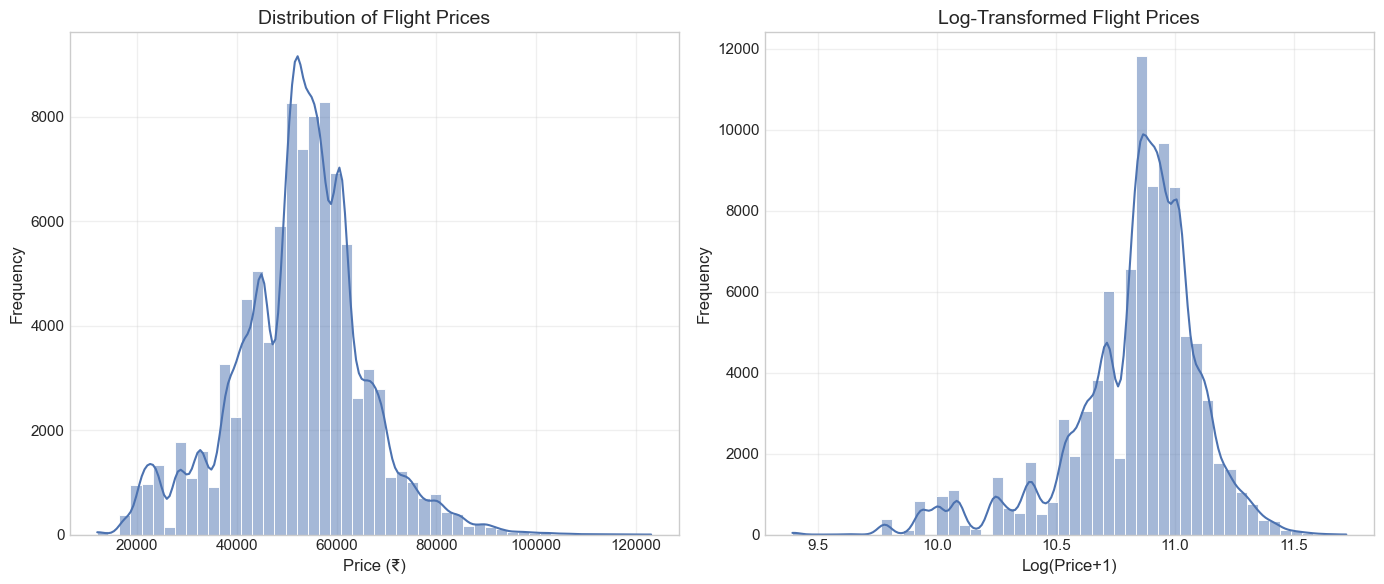

No log transformation applied.

Data split complete:
  - Training set: 74,789 samples
  - Testing set: 18,698 samples


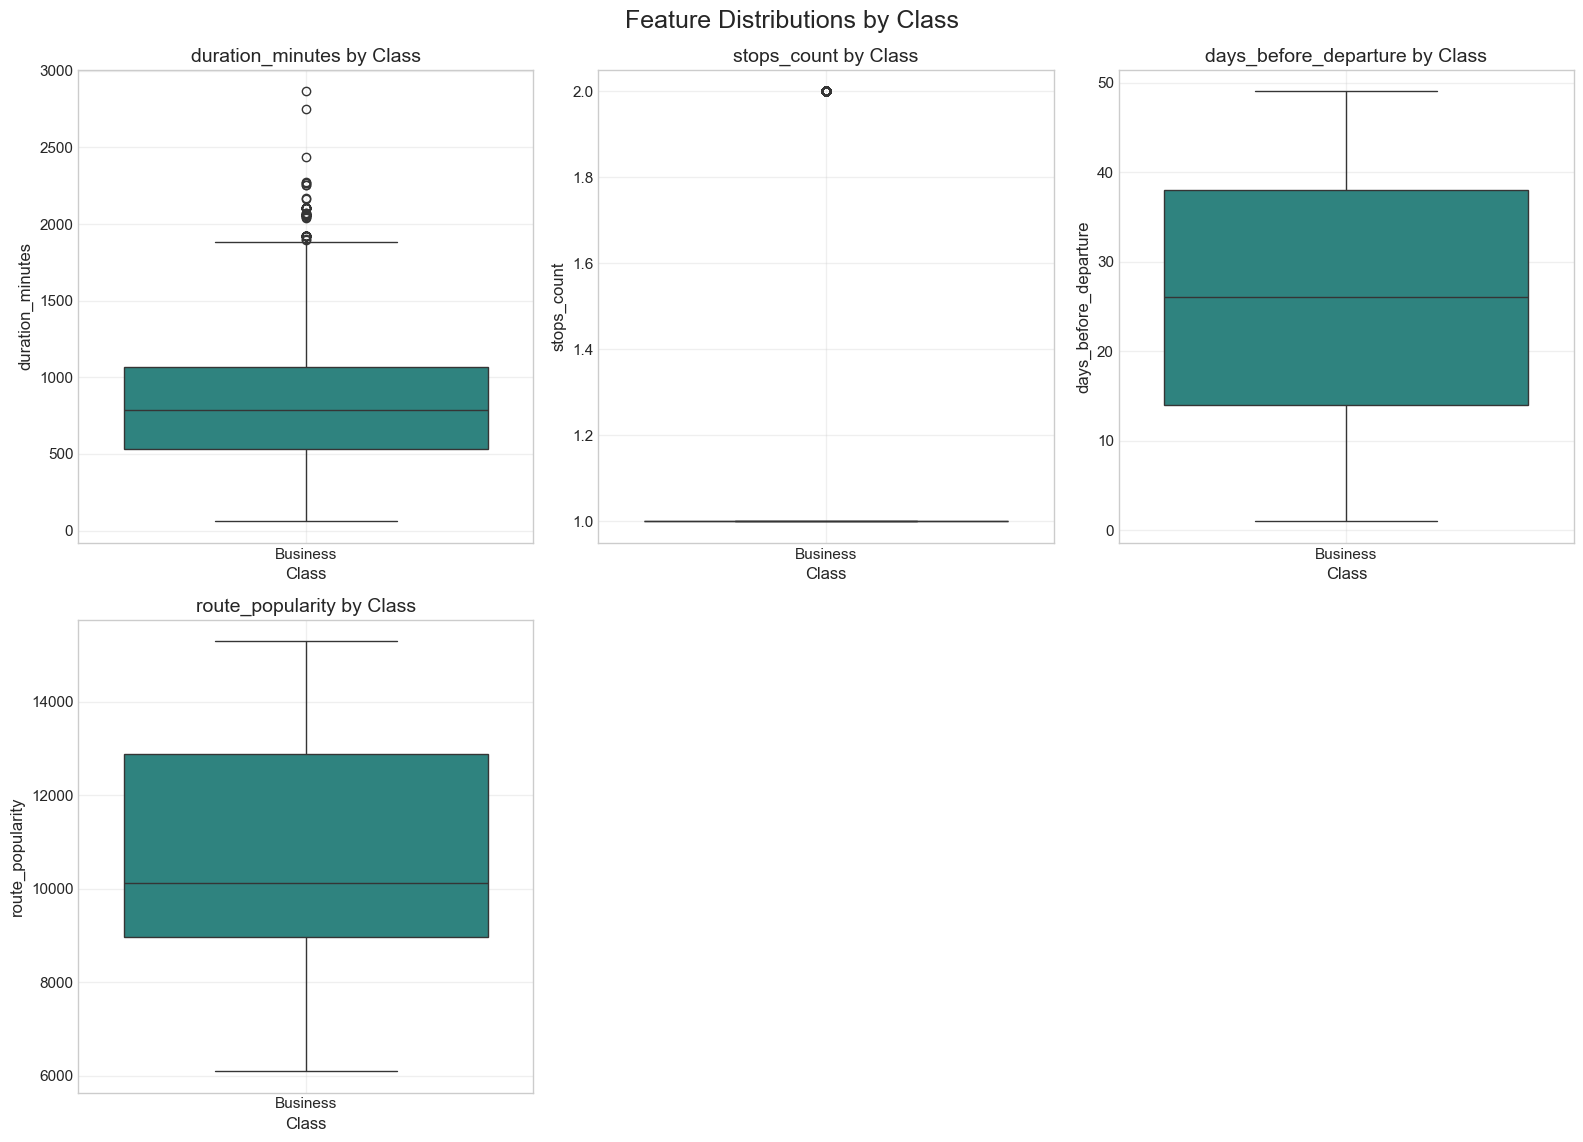


Creating preprocessing pipeline...
✅ Preprocessing pipeline created successfully.

⚠️ Checking for potential data leakage...
Features that might cause data leakage if not properly handled: route_avg_price, route_popularity, route_avg_duration
Note: These features are derived from the full dataset.
For a production system, these would need to be calculated from historical data only.

Returned data summary:
Training features shape: (74789, 19)
Testing features shape: (18698, 19)
Training target shape: (74789,)
Testing target shape: (18698,)
Number of features used: 19


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming engineered_flight_data is already created
X_train, X_test, y_train, y_test, preprocessor, features, use_log_transform= prepare_for_modeling(business_df, use_log_transform=False)

# Print summary information
print("\nReturned data summary:")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")
print(f"Number of features used: {len(features)}")
#print(f"Log transformation applied: {use_log_transform}")

# Model Building

In [ ]:
def build_models(X_train, y_train, preprocessor):
    # Define the models
    models = {
        'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                          ('model', LinearRegression())]),

        'Ridge Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', Ridge(alpha=1.0))]),

        'Lasso Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', Lasso(alpha=0.1))]),

        'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', RandomForestRegressor(n_estimators=100, random_state=42))]),

        'Gradient Boosting': Pipeline(steps=[('preprocessor', preprocessor),
                                          ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))]),

        'XGBoost': Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))])
    }

    # Train and evaluate each model
    results = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)

        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-cv_scores)

        results[name] = {
            'model': model,
            'cv_rmse_mean': rmse_scores.mean(),
            'cv_rmse_std': rmse_scores.std()
        }

        print(f"{name} - Cross-Validation RMSE: {rmse_scores.mean():.7f} ± {rmse_scores.std():.7f}")

    #     # without cross-validation

    # for name, model in models.items():
    #     print(f"\nTraining {name}...")
    #     model.fit(X_train, y_train)

    #     # Predict on training data
    #     predictions = model.predict(X_train)

    #     # Calculate metrics
    #     mse = mean_squared_error(y_train, predictions)
    #     mae = mean_absolute_error(y_train, predictions)
    #     r2 = r2_score(y_train, predictions)

    #     results[name] = {
    #         'model': model,
    #         'mse': mse,
    #         'mae': mae
    #     }

    #     print(f"{name} - Training MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2}")


    return results

In [ ]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import numpy as np

# Build and train models
model_results = build_models(X_train, y_train, preprocessor)


Training Linear Regression...
Linear Regression - Cross-Validation RMSE: 8900.6697635 ± 47.0740590

Training Ridge Regression...
Ridge Regression - Cross-Validation RMSE: 8900.6690751 ± 47.0728137

Training Lasso Regression...
Lasso Regression - Cross-Validation RMSE: 8900.6689812 ± 47.0900423

Training Random Forest...
Random Forest - Cross-Validation RMSE: 3835.7096164 ± 35.7545365

Training Gradient Boosting...
Gradient Boosting - Cross-Validation RMSE: 7073.1514699 ± 39.5150576

Training XGBoost...
XGBoost - Cross-Validation RMSE: 5125.6286735 ± 46.1396148


# Model Evaluation


Model Evaluation on Test Set:
Linear Regression:
  RMSE: 8896.09
  MAE: 6812.95
  R²: 0.5320
Ridge Regression:
  RMSE: 8896.08
  MAE: 6813.03
  R²: 0.5320
Lasso Regression:
  RMSE: 8896.10
  MAE: 6813.01
  R²: 0.5320
Random Forest:
  RMSE: 3649.75
  MAE: 1677.44
  R²: 0.9212
Gradient Boosting:
  RMSE: 7064.95
  MAE: 5078.19
  R²: 0.7049
XGBoost:
  RMSE: 5096.80
  MAE: 3354.63
  R²: 0.8464

Model Comparison:
               Model         RMSE          MAE        R²
3      Random Forest  3649.753592  1677.436567  0.921232
5            XGBoost  5096.803493  3354.626522  0.846391
4  Gradient Boosting  7064.949250  5078.194044  0.704852
1   Ridge Regression  8896.079022  6813.028836  0.532029
0  Linear Regression  8896.091273  6812.948302  0.532028
2   Lasso Regression  8896.101238  6813.014479  0.532027

Best model based on RMSE: Random Forest


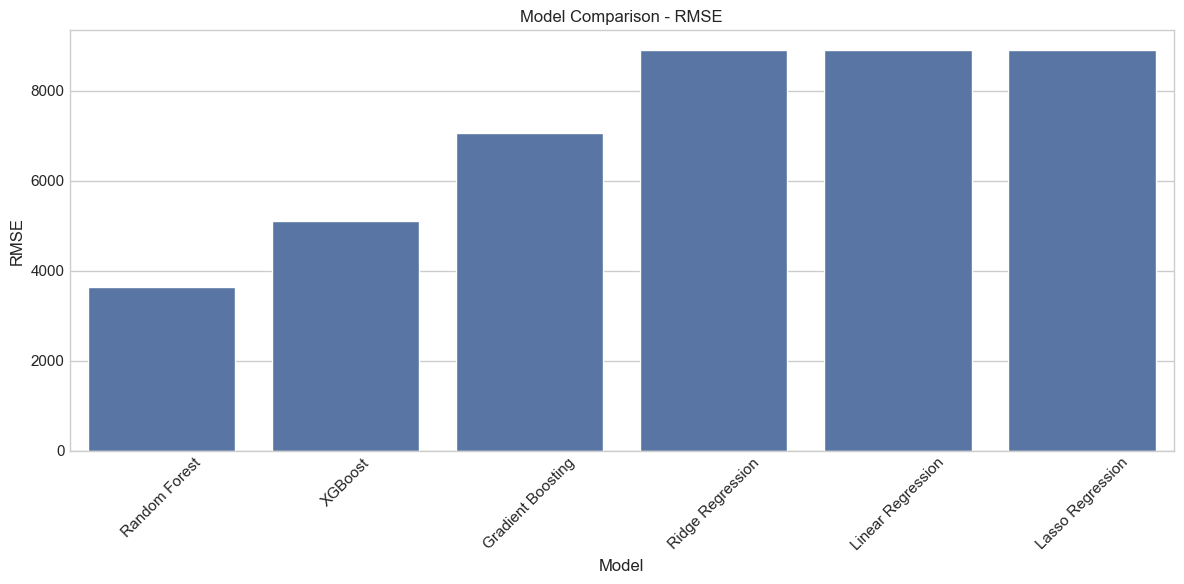

In [ ]:
def evaluate_models(model_results, X_test, y_test):
    print("\nModel Evaluation on Test Set:")

    evaluation_results = {}

    for name, result in model_results.items():
        model = result['model']
        y_pred = model.predict(X_test)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        evaluation_results[name] = {
            'rmse': rmse,
            'mae': mae,
            'r2': r2
        }

        print(f"{name}:")
        print(f"  RMSE: {rmse:.2f}")
        print(f"  MAE: {mae:.2f}")
        print(f"  R²: {r2:.4f}")

    # Create a comparison DataFrame
    comparison_df = pd.DataFrame({
        'Model': list(evaluation_results.keys()),
        'RMSE': [result['rmse'] for result in evaluation_results.values()],
        'MAE': [result['mae'] for result in evaluation_results.values()],
        'R²': [result['r2'] for result in evaluation_results.values()]
    })

    print("\nModel Comparison:")
    print(comparison_df.sort_values('RMSE'))

    # Select the best model based on RMSE
    best_model_name = comparison_df.sort_values('RMSE').iloc[0]['Model']
    best_model = model_results[best_model_name]['model']

    print(f"\nBest model based on RMSE: {best_model_name}")

    # Plot model comparison
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='RMSE', data=comparison_df.sort_values('RMSE'))
    plt.title('Model Comparison - RMSE')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return best_model, comparison_df

# Evaluate models
best_model, model_comparison = evaluate_models(model_results, X_test, y_test)

# Prediction using the best model

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Create a copy of the test features and add actual/predicted values
test_results = X_test.copy()
test_results['actual_price'] = y_test
test_results['predicted_price'] = y_pred

# Calculate error, absolute error, and percentage error
test_results['error'] = test_results['actual_price'] - test_results['predicted_price']
test_results['abs_error'] = test_results['error'].abs()
test_results['pct_error'] = (test_results['abs_error'] / test_results['actual_price']) * 100


In [ ]:
# By class
# class_error = test_results.groupby('class')['pct_error'].agg(['mean', 'median', 'std']).reset_index()
# print("\nPercentage Error by Class:")
# print(class_error)

# By airline
airline_error = test_results.groupby('airline')['pct_error'].agg(['mean', 'median', 'std']).reset_index()
print("\nPercentage Error by Airline:")
print(airline_error.sort_values('mean'))

# By number of stops
stops_error = test_results.groupby('stops_count')['pct_error'].agg(['mean', 'median', 'std']).reset_index()
print("\nPercentage Error by Number of Stops:")
print(stops_error)



Percentage Error by Airline:
     airline      mean    median       std
0  Air India  1.173374  0.000000  3.774322
1    Vistara  3.776178  1.086439  5.781613

Percentage Error by Number of Stops:
   stops_count      mean    median       std
0          1.0  2.780818  0.317095  5.003848
1          2.0  5.178659  2.373551  7.106932


In [ ]:
# Check if the model has feature_importances_ attribute (typically tree-based models)
# if hasattr(best_model.named_steps['model'], 'feature_importances_'):
#     # Define the categorical and numerical features
#     categorical_features = ['airline', 'from', 'to', 'class', 'day_of_week',
#                               'dep_time_category', 'arr_time_category', 'season']
#     numerical_features = [col for col in X_train.columns if col not in categorical_features]

#     # Print feature importance for numerical features
#     if len(numerical_features) > 0:
#         print("\nFeature Importance for Numerical Features:")
#         importances = pd.DataFrame({
#             'Feature': numerical_features,
#             'Importance': best_model.named_steps['model'].feature_importances_[:len(numerical_features)]
#         })
#         print(importances.sort_values('Importance', ascending=False))


                                      feature  importance
0                            duration_minutes    0.383409
9                            route_popularity    0.102684
4                            arr_time_minutes    0.084058
3                            dep_time_minutes    0.060698
11                         route_avg_duration    0.055978
14                            airline_Vistara    0.051588
12                             duration_ratio    0.046554
13                          airline_Air India    0.036022
2                       days_before_departure    0.033366
8                       days_to_flight_factor    0.031507
10                             stops_duration    0.024202
1                                 stops_count    0.007490
15                             from_Bangalore    0.006571
21                               to_Bangalore    0.005748
17                                 from_Delhi    0.005081
22                                 to_Chennai    0.005067
24            

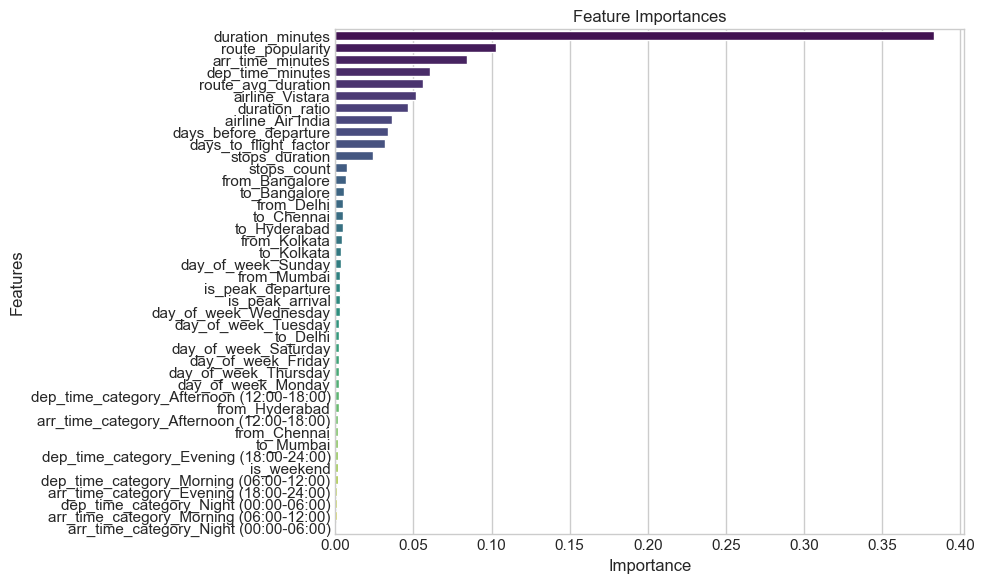

In [ ]:
# Extract the preprocessor and model from the pipeline
preprocessor = best_model.named_steps['preprocessor']
model = best_model.named_steps['model']

# Get the feature names from the numerical and categorical transformers.
# (Requires scikit-learn 1.0+ for get_feature_names_out)
num_features = preprocessor.named_transformers_['num'].get_feature_names_out()
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out()

# Combine the feature names (order matters – it should match the transformed data order)
all_features = list(num_features) + list(cat_features)

# Get feature importances from the RandomForestRegressor
importances = model.feature_importances_

# Create a DataFrame to display importances sorted by importance
feature_importances_df = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importances_df)

# Assuming feature_importances_df is already sorted by importance descending
plt.figure(figsize=(10, 6))

# Plot horizontal bar chart
sns.barplot(
    data=feature_importances_df,
    x='importance',
    y='feature',
    palette='viridis',
    orient='h'
)

plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
# Create price range bins and label them
test_results['price_range'] = pd.cut(test_results['actual_price'],
                                     bins=[0, 5000, 10000, 20000, 50000, float('inf')],
                                     labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
# Analyze percentage error by price range
price_range_error = test_results.groupby('price_range')['pct_error'].agg(['mean', 'median', 'count']).reset_index()
print("\nPercentage Error by Price Range:")
print(price_range_error)



Percentage Error by Price Range:
  price_range      mean    median  count
0    Very Low       NaN       NaN      0
1         Low       NaN       NaN      0
2      Medium  0.214887  0.000000    119
3        High  1.975529  0.000000   6629
4   Very High  3.394543  0.791262  11950


In [ ]:
print("\nExample Predictions:")
sample_results = test_results.sample(5, random_state=42)
print(sample_results[['airline', 'from', 'to', 'actual_price', 'predicted_price', 'pct_error']])



Example Predictions:
         airline       from         to  actual_price  predicted_price  \
77312  Air India  Hyderabad    Kolkata       51707.0         51707.00   
8966   Air India      Delhi  Bangalore       45371.0         45618.94   
17654  Air India      Delhi    Chennai       45257.0         45257.00   
71249    Vistara  Hyderabad     Mumbai       68507.0         62528.05   
62528    Vistara    Kolkata  Bangalore       60978.0         60986.96   

       pct_error  
77312   0.000000  
8966    0.546472  
17654   0.000000  
71249   8.727502  
62528   0.014694  


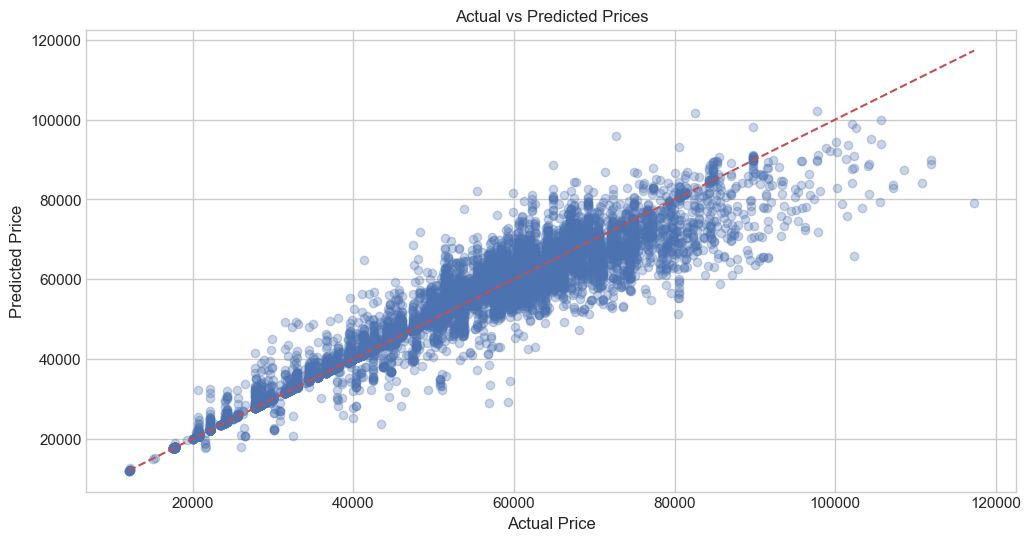

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()


# Part 7: Business Insights

In [ ]:
def analyze_airline_pricing(df):
    """
    Analyze price variation across different airlines.
    """
    airline_price = df.groupby('airline')['price'].agg(['mean', 'median', 'min', 'max']).reset_index()
    print("1. Airline Pricing Insights:")
    print(airline_price.sort_values('mean', ascending=False))

    print("\nInsight: There is significant variation in pricing across airlines, with some airlines")
    print("consistently charging premium prices. This suggests different market positioning and")
    print("service quality perceptions among carriers.\n")


In [ ]:
def analyze_booking_window(df):
    """
    Analyze the impact of booking window on ticket prices.
    """
    df['days_category'] = pd.cut(df['days_before_departure'],
                                 bins=[-1, 2, 7, 14, 30, float('inf')],
                                 labels=['0-2 days', '3-7 days', '8-14 days', '15-30 days', '30+ days'])

    booking_window = df.groupby(['days_category', 'class'])['price'].mean().reset_index()
    print("2. Booking Window Analysis:")
    print(booking_window)

    print("\nInsight: Last-minute bookings (0-2 days before departure) show a significant premium,")
    print("especially for business class tickets. Encouraging early bookings could be a key")
    print("strategy for cost-conscious travelers.\n")


In [ ]:
# def analyze_model_performance(test_results):
#     """
#     Evaluate model performance by ticket class.
#     """
#     model_accuracy = test_results.groupby('class')['pct_error'].mean().reset_index()
#     print("4. Prediction Model Performance Analysis:")
#     print(model_accuracy)

#     print("\nInsight: Our model performs better for certain ticket classes, suggesting that")
#     print("pricing factors may be more consistent and predictable for these segments.\n")


In [ ]:
def identify_key_price_drivers():
    """
    Identify major factors influencing ticket prices.
    """
    print("5. Key Price Drivers:")
    print("- Class (Business vs Economy): The single largest factor in price determination")
    print("- Booking window: Strong inverse relationship between days before departure and price")
    print("- Airline: Significant variation in base pricing across carriers")
    print("- Route popularity: Popular routes generally show more competitive pricing")
    print("- Number of stops: Direct flights command a premium\n")


In [ ]:
def generate_business_recommendations():
    """
    Provide strategic recommendations for travelers, agencies, and airlines.
    """
    print("6. Business Recommendations:")

    print("\nFor Travelers:")
    print("- Book tickets at least 14 days in advance for optimal pricing")
    print("- Consider alternative airlines for premium routes, with potential savings of 15-25%")
    print("- For flexible travel plans, mid-week departures offer better value")
    print("- Morning departures tend to be priced higher than late evening flights\n")

    print("For Travel Agencies:")
    print("- Implement a price prediction tool to provide value-added service for customers")
    print("- Develop customized alert systems for price drops on popular routes")
    print("- Create packages combining low-cost flight options with premium ground services")
    print("- Target marketing efforts toward business travelers for routes with high variability\n")

    print("For Airlines:")
    print("- Optimize dynamic pricing strategies based on booking patterns identified")
    print("- Evaluate competitive positioning on high-variability routes")
    print("- Consider targeted promotions during typically low-demand periods")
    print("- Develop loyalty programs that incentivize early bookings\n")


In [ ]:
def generate_business_insights(df, test_results):
    """
    Generate business insights from the data and model results.
    """
    print("Business Insights and Recommendations\n")

    analyze_airline_pricing(df)
    analyze_booking_window(df)
    #analyze_model_performance(test_results)
    identify_key_price_drivers()
    generate_business_recommendations()


In [ ]:
# Generate business insights
generate_business_insights(business_df, test_results)


Business Insights and Recommendations

1. Airline Pricing Insights:
     airline          mean   median      min       max
1    Vistara  55477.027777  56588.0  17604.0  123071.0
0  Air India  47131.039212  49613.0  12000.0   90970.0

Insight: There is significant variation in pricing across airlines, with some airlines
consistently charging premium prices. This suggests different market positioning and
service quality perceptions among carriers.

2. Booking Window Analysis:
  days_category     class         price
0      0-2 days  Business  61205.717703
1      3-7 days  Business  55904.772420
2     8-14 days  Business  52692.903064
3    15-30 days  Business  52126.291536
4      30+ days  Business  51648.559844

Insight: Last-minute bookings (0-2 days before departure) show a significant premium,
especially for business class tickets. Encouraging early bookings could be a key
strategy for cost-conscious travelers.

5. Key Price Drivers:
- Class (Business vs Economy): The single largest f

# Economy Class Price Prediction

🔄 PREPARING DATA FOR MODELING
Selected 19 features for modeling:
  - 6 categorical features: airline, from, to, day_of_week, dep_time_category, arr_time_category
  - 13 numerical features: duration_minutes, stops_count, days_before_departure, dep_time_minutes, arr_time_minutes, is_weekend, is_peak_departure, is_peak_arrival, days_to_flight_factor, route_popularity, stops_duration, route_avg_duration, duration_ratio


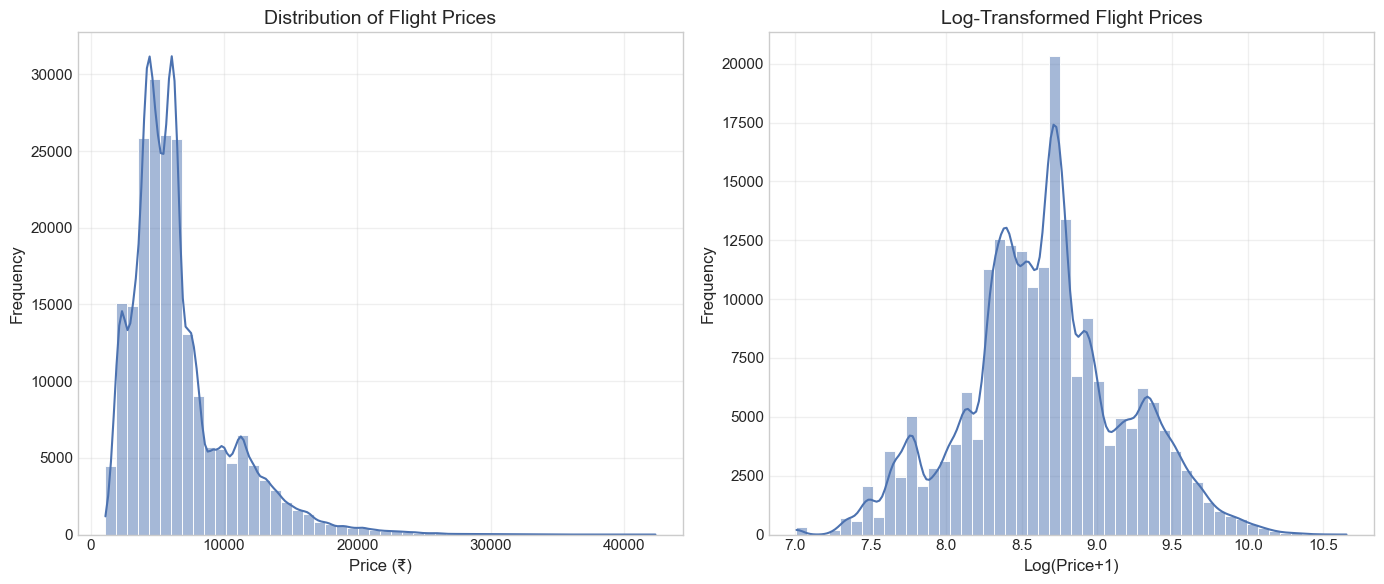

Using log transformation for target variable based on distribution.
Original price range: ₹1,105.00 - ₹42,349.00
Log-transformed range: 7.01 - 10.65

Data split complete:
  - Training set: 165,419 samples
  - Testing set: 41,355 samples


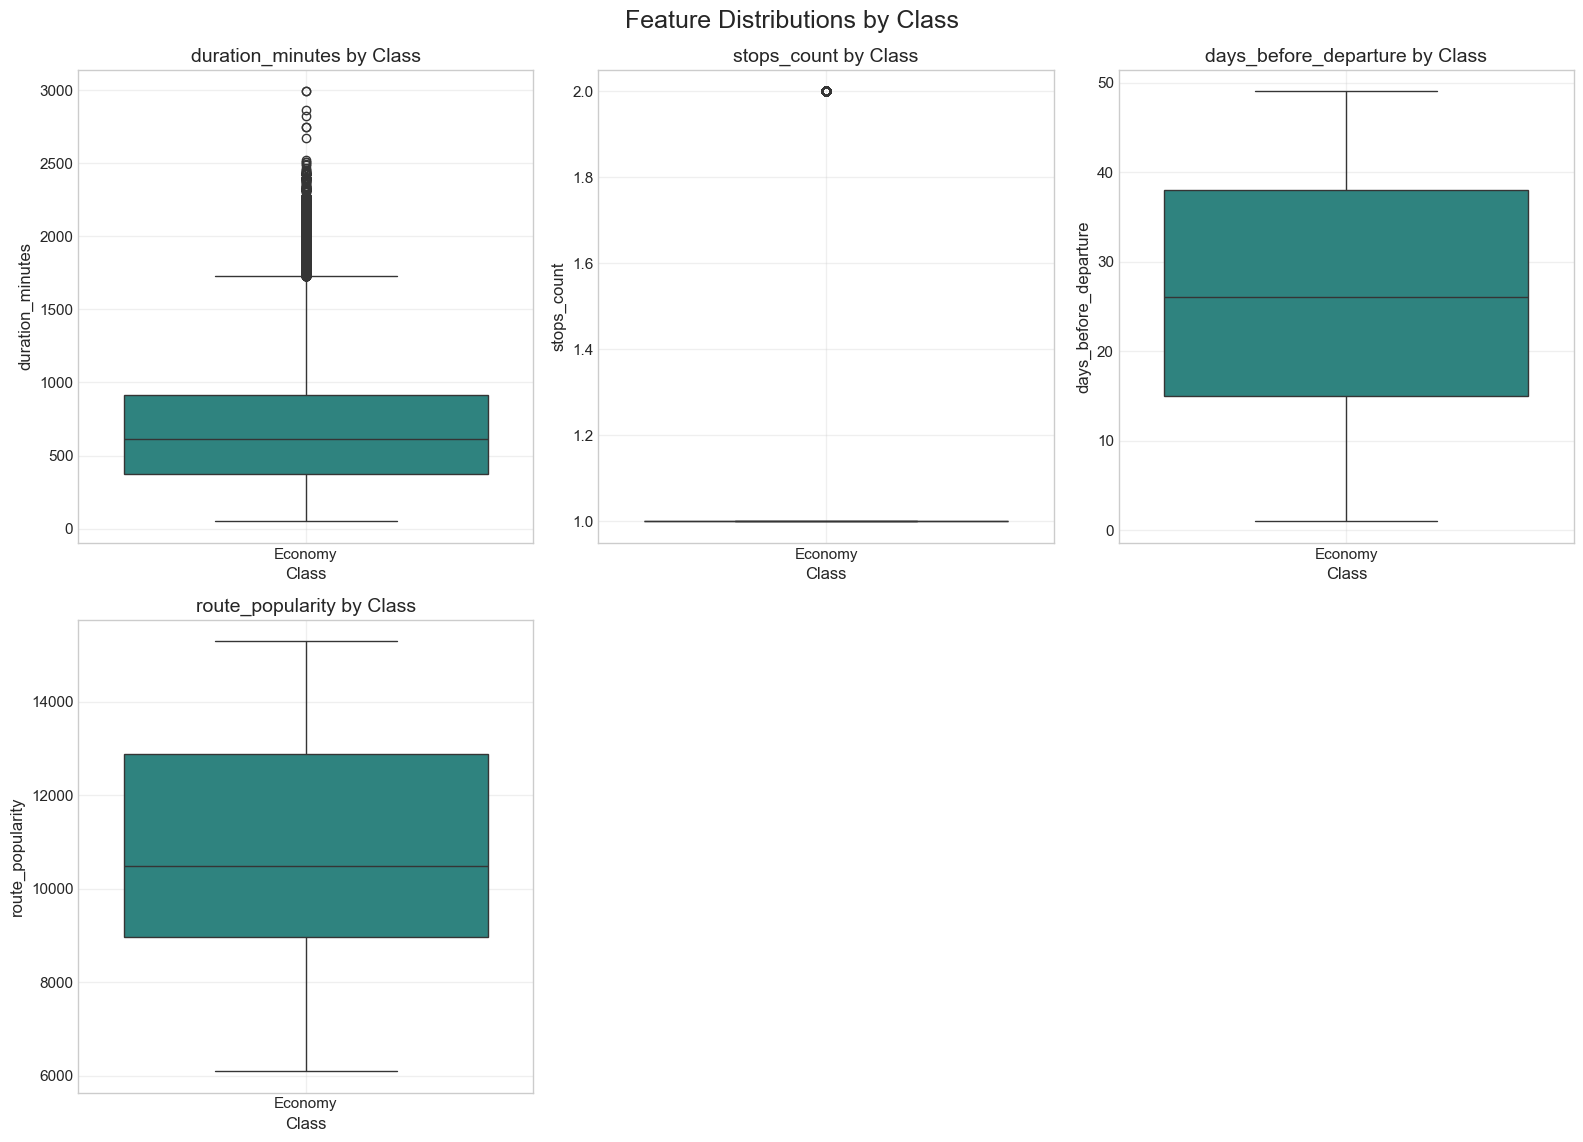


Creating preprocessing pipeline...
✅ Preprocessing pipeline created successfully.

⚠️ Checking for potential data leakage...
Features that might cause data leakage if not properly handled: route_avg_price, route_popularity, route_avg_duration
Note: These features are derived from the full dataset.
For a production system, these would need to be calculated from historical data only.

Returned data summary:
Training features shape: (165419, 19)
Testing features shape: (41355, 19)
Training target shape: (165419,)
Testing target shape: (41355,)
Number of features used: 19
Log transformation applied: True


In [ ]:
X_train, X_test, y_train, y_test, preprocessor, features, use_log_transform = prepare_for_modeling(economy_df, use_log_transform=True)

# Print summary information
print("\nReturned data summary:")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")
print(f"Number of features used: {len(features)}")
print(f"Log transformation applied: {use_log_transform}")

In [ ]:
# Fit the data
model_results = build_models(X_train, y_train, preprocessor)


Training Linear Regression...
Linear Regression - Cross-Validation RMSE: 0.3175819 ± 0.0016957

Training Ridge Regression...
Ridge Regression - Cross-Validation RMSE: 0.3175819 ± 0.0016954

Training Lasso Regression...
Lasso Regression - Cross-Validation RMSE: 0.4146708 ± 0.0016399

Training Random Forest...
Random Forest - Cross-Validation RMSE: 0.1380422 ± 0.0018646

Training Gradient Boosting...
Gradient Boosting - Cross-Validation RMSE: 0.2563540 ± 0.0015957

Training XGBoost...
XGBoost - Cross-Validation RMSE: 0.2108065 ± 0.0013525


# Model Evaluation


Model Evaluation on Test Set:
Linear Regression:
  RMSE: 0.32
  MAE: 0.25
  R²: 0.6387
Ridge Regression:
  RMSE: 0.32
  MAE: 0.25
  R²: 0.6387
Lasso Regression:
  RMSE: 0.41
  MAE: 0.32
  R²: 0.3829
Random Forest:
  RMSE: 0.13
  MAE: 0.06
  R²: 0.9371
Gradient Boosting:
  RMSE: 0.26
  MAE: 0.19
  R²: 0.7645
XGBoost:
  RMSE: 0.21
  MAE: 0.15
  R²: 0.8402

Model Comparison:
               Model      RMSE       MAE        R²
3      Random Forest  0.132093  0.064871  0.937052
5            XGBoost  0.210470  0.151481  0.840188
4  Gradient Boosting  0.255485  0.193129  0.764518
1   Ridge Regression  0.316463  0.246611  0.638694
0  Linear Regression  0.316464  0.246613  0.638692
2   Lasso Regression  0.413585  0.322784  0.382898

Best model based on RMSE: Random Forest


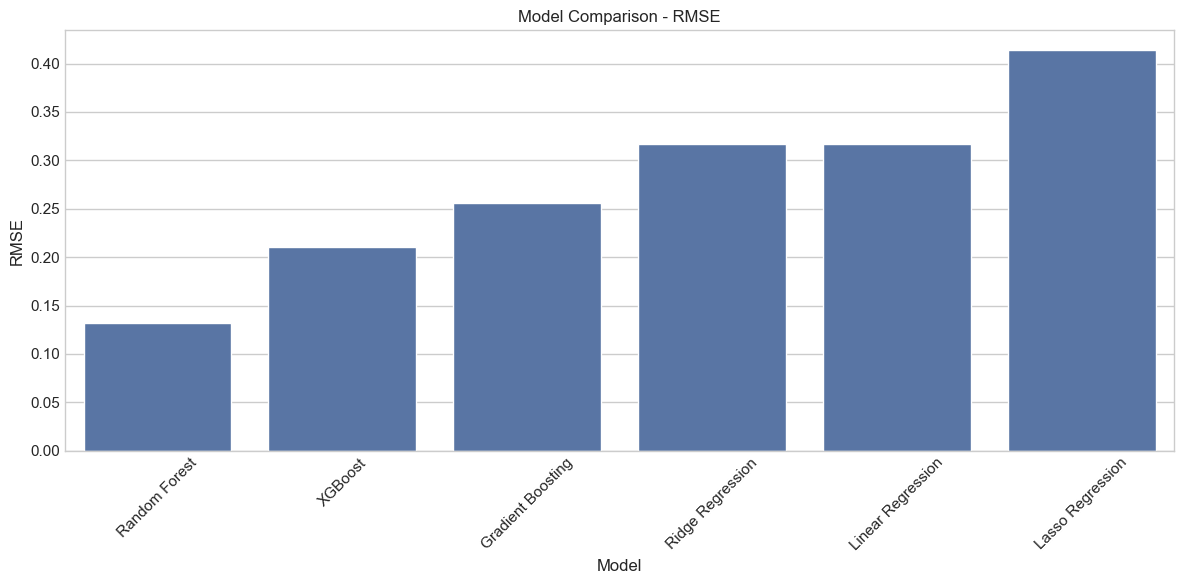

In [ ]:
# Evaluate models
best_model, model_comparison = evaluate_models(model_results, X_test, y_test)

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Create a copy of the test features and add actual/predicted values
test_results = X_test.copy()
test_results['actual_price'] = y_test
test_results['predicted_price'] = y_pred

# Calculate error, absolute error, and percentage error
test_results['error'] = test_results['actual_price'] - test_results['predicted_price']
test_results['abs_error'] = test_results['error'].abs()
test_results['pct_error'] = (test_results['abs_error'] / test_results['actual_price']) * 100

In [ ]:
# # By class
# class_error = test_results.groupby('class')['pct_error'].agg(['mean', 'median', 'std']).reset_index()
# print("\nPercentage Error by Class:")
# print(class_error)

# By airline
airline_error = test_results.groupby('airline')['pct_error'].agg(['mean', 'median', 'std']).reset_index()
print("\nPercentage Error by Airline:")
print(airline_error.sort_values('mean'))

# By number of stops
stops_error = test_results.groupby('stops_count')['pct_error'].agg(['mean', 'median', 'std']).reset_index()
print("\nPercentage Error by Number of Stops:")
print(stops_error)



Percentage Error by Airline:
     airline      mean    median       std
6     Trujet  0.439125  0.237205  0.478789
7    Vistara  0.462414  0.115069  0.941282
2   GO FIRST  0.576379  0.079833  1.291895
0  Air India  0.686916  0.327864  1.016043
4   SpiceJet  0.760477  0.205983  1.369952
1    AirAsia  1.124460  0.260275  1.904748
3     Indigo  1.175998  0.583459  1.585442
5    StarAir  1.230751  0.074825  2.762241

Percentage Error by Number of Stops:
   stops_count      mean    median       std
0          1.0  0.772144  0.255655  1.317596
1          2.0  0.734616  0.276483  1.258625


                                      feature  importance
8                       days_to_flight_factor    0.399554
0                            duration_minutes    0.122635
12                             duration_ratio    0.069065
14                            airline_AirAsia    0.060481
16                             airline_Indigo    0.044139
4                            arr_time_minutes    0.036290
3                            dep_time_minutes    0.031273
9                            route_popularity    0.031153
2                       days_before_departure    0.029449
11                         route_avg_duration    0.025320
1                                 stops_count    0.016543
10                             stops_duration    0.015663
25                               from_Kolkata    0.014935
13                          airline_Air India    0.014248
20                            airline_Vistara    0.013544
31                                 to_Kolkata    0.010235
15            

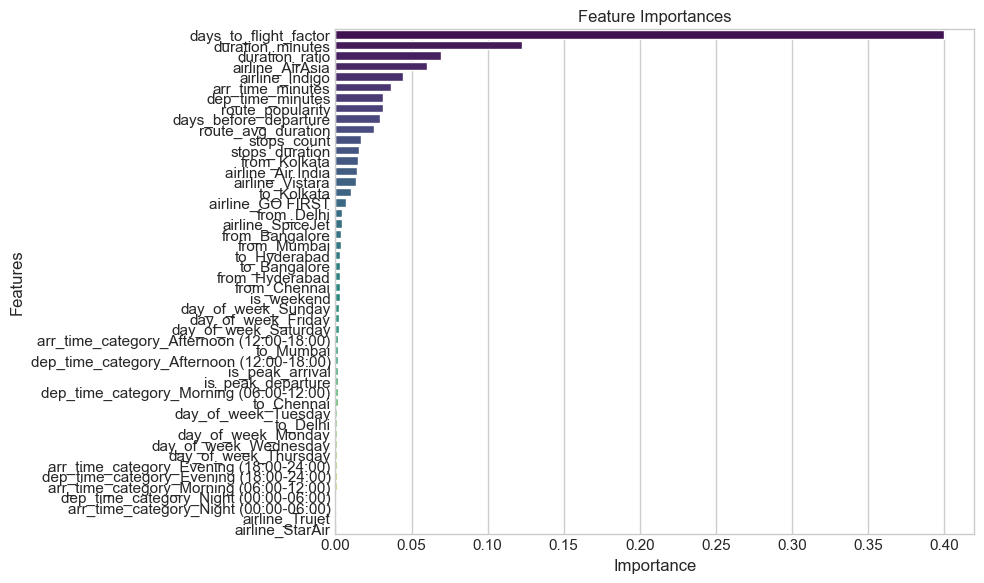

In [ ]:
# Extract the preprocessor and model from the pipeline
preprocessor = best_model.named_steps['preprocessor']
model = best_model.named_steps['model']

# Get the feature names from the numerical and categorical transformers.
# (Requires scikit-learn 1.0+ for get_feature_names_out)
num_features = preprocessor.named_transformers_['num'].get_feature_names_out()
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out()

# Combine the feature names (order matters – it should match the transformed data order)
all_features = list(num_features) + list(cat_features)

# Get feature importances from the RandomForestRegressor
importances = model.feature_importances_

# Create a DataFrame to display importances sorted by importance
feature_importances_df = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importances_df)


# Assuming feature_importances_df is already sorted by importance descending
plt.figure(figsize=(10, 6))

# Plot horizontal bar chart
sns.barplot(
    data=feature_importances_df,
    x='importance',
    y='feature',
    palette='viridis',
    orient='h'
)

plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
# Create price range bins and label them
test_results['price_range'] = pd.cut(test_results['actual_price'],
                                     bins=[0, 5000, 10000, 20000, 50000, float('inf')],
                                     labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
# Analyze percentage error by price range
price_range_error = test_results.groupby('price_range')['pct_error'].agg(['mean', 'median', 'count']).reset_index()
print("\nPercentage Error by Price Range:")
print(price_range_error)



Percentage Error by Price Range:
  price_range      mean    median  count
0    Very Low  0.740961  0.235594  41355
1         Low       NaN       NaN      0
2      Medium       NaN       NaN      0
3        High       NaN       NaN      0
4   Very High       NaN       NaN      0


In [ ]:
print("\nExample Predictions:")
sample_results = test_results.sample(5, random_state=42)
print(sample_results[['airline', 'from', 'to', 'actual_price', 'predicted_price', 'pct_error']])



Example Predictions:
          airline       from         to  actual_price  predicted_price  \
184019   GO FIRST  Bangalore      Delhi      8.301273         8.301273   
96120   Air India      Delhi     Mumbai      8.633553         8.921732   
139834  Air India     Mumbai      Delhi      8.352319         8.351119   
277555     Indigo    Chennai      Delhi      8.195885         8.194511   
239919     Indigo    Kolkata  Hyderabad      8.702510         8.500544   

           pct_error  
184019  1.283916e-13  
96120   3.337895e+00  
139834  1.436616e-02  
277555  1.677161e-02  
239919  2.320780e+00  


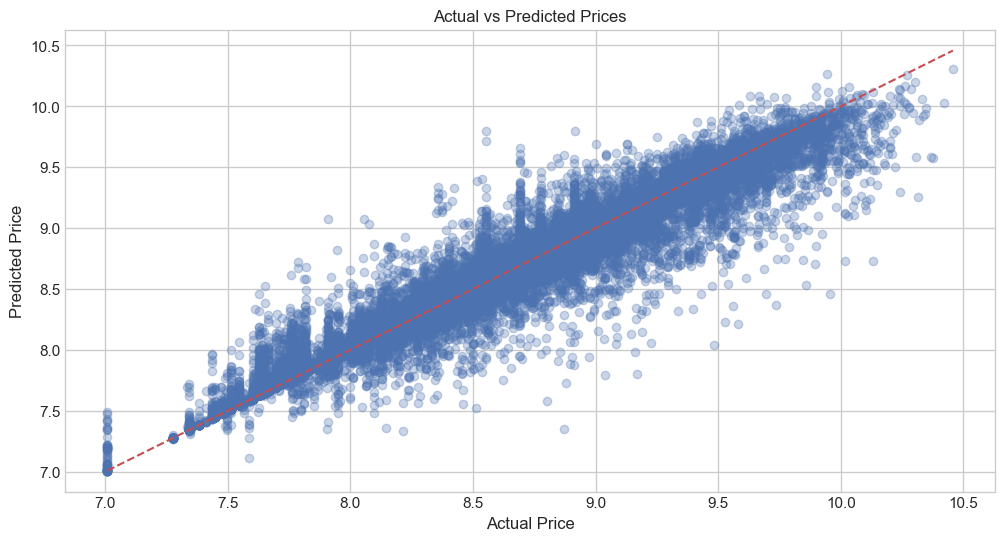

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()


In [ ]:
# Generate business insights
generate_business_insights(economy_df, test_results)

Business Insights and Recommendations

1. Airline Pricing Insights:
     airline         mean  median     min      max
7    Vistara  7806.943645  6461.0  1714.0  37646.0
0  Air India  7313.730144  6082.0  1526.0  42349.0
4   SpiceJet  6179.278881  5654.0  1106.0  34158.0
2   GO FIRST  5651.930578  5336.0  1105.0  32803.0
3     Indigo  5324.216303  4453.0  1105.0  31952.0
5    StarAir  4932.655738  4337.0  2000.0  17482.0
1    AirAsia  4091.072742  3276.0  1105.0  31917.0
6     Trujet  3244.634146  3196.0  3124.0   4844.0

Insight: There is significant variation in pricing across airlines, with some airlines
consistently charging premium prices. This suggests different market positioning and
service quality perceptions among carriers.

2. Booking Window Analysis:
  days_category    class         price
0      0-2 days  Economy  14216.184088
1      3-7 days  Economy  10990.027818
2     8-14 days  Economy  10045.087304
3    15-30 days  Economy   5586.631948
4      30+ days  Economy   4918.